# <center><b> CREDIT CARD FRAUD DETECTION </b></center>
# <center> <b> A Comparative Analysis of Optimal Classification Models </b></center>

<center> <i> Evaluating the Effectiveness of Diverse Machine Learning Algorithms in Credit Card Fraud Detection </i> </center> 

# Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.feature_selection import SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import normalize, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, classification_report, f1_score, jaccard_score, log_loss, confusion_matrix
import time
import pickle
import warnings

warnings.filterwarnings("ignore")

## -> Importing the dataset into the environment

In [2]:
creditCardData = pd.read_csv('creditcard_2013.csv')

# Inspecting the dataset

In [3]:
creditCardData.shape  # The dataset contains 2,84,807 records of credit card transactions and 31 features

(284807, 31)

In [4]:
creditCardData.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditCardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
creditCardData.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print("The count of duplicate entries in our dataset : ",creditCardData.duplicated().sum())

The count of duplicate entries in our dataset :  1081


In [8]:
creditCardData = creditCardData.drop_duplicates()
print("The count of duplicate entries in our dataset : ", creditCardData.duplicated().sum())
print(f"Shape of the dataset : {creditCardData.shape}")

The count of duplicate entries in our dataset :  0
Shape of the dataset : (283726, 31)


In [9]:
# compare the values for both transactions
creditCardData.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94835.058093,0.013439,-0.009829,0.012853,-0.010440,0.006769,0.001251,0.010447,-0.002448,0.002613,...,-0.000489,-0.00115,-0.000160,0.000360,0.000393,-0.000301,0.000065,0.001409,0.000418,88.413575
1,80450.513742,-4.498280,3.405965,-6.729599,4.472591,-2.957197,-1.432518,-5.175912,0.953255,-2.522124,...,0.405043,0.46655,0.086639,-0.096464,-0.106643,0.040615,0.050456,0.213774,0.078270,123.871860


In [10]:
creditCardData.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


choose X label feature for scatterplot visualisation Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') :  V18
choose Y label feature for scatterplot visualisation Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object') :  Amount


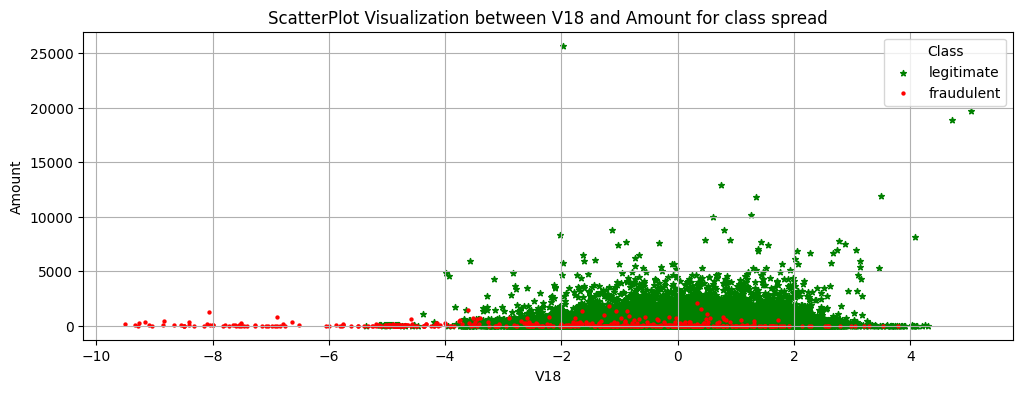

In [11]:
def classSpread(feature1, feature2):
    plt.figure(figsize=(12, 4))

    plt.scatter(creditCardData[creditCardData['Class'] == 0][feature1], creditCardData[creditCardData['Class'] == 0][feature2], marker = '*', color = 'green', label = 'legitimate', s=18)

    plt.scatter(creditCardData[creditCardData['Class'] == 1][feature1], creditCardData[creditCardData['Class'] == 1][feature2], marker='.', color='red', label = 'fraudulent', s=18)
    
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    
    plt.title('ScatterPlot Visualization between %s and %s for class spread' %(feature1, feature2))
    plt.legend(title='Class')
    
    plt.grid(True)
    plt.show()

feature1 = input(f"choose X label feature for scatterplot visualisation {creditCardData.drop(columns = 'Class', axis = 1).columns} : ")
feature2 = input(f"choose Y label feature for scatterplot visualisation {creditCardData.drop(columns = ['Class',feature1], axis = 1).columns} : ")
classSpread(feature1, feature2)

# -> Feature Independence Assessment (Multicollinearity Check)

- <i> In our dataset, feature extraction techniques have already been employed, capturing the essential information inherent in the data. This approach allows us to believe that the most relevant features are present without the need for further feature selection. Consequently, we can focus on leveraging these extracted features for effective model training. </i>

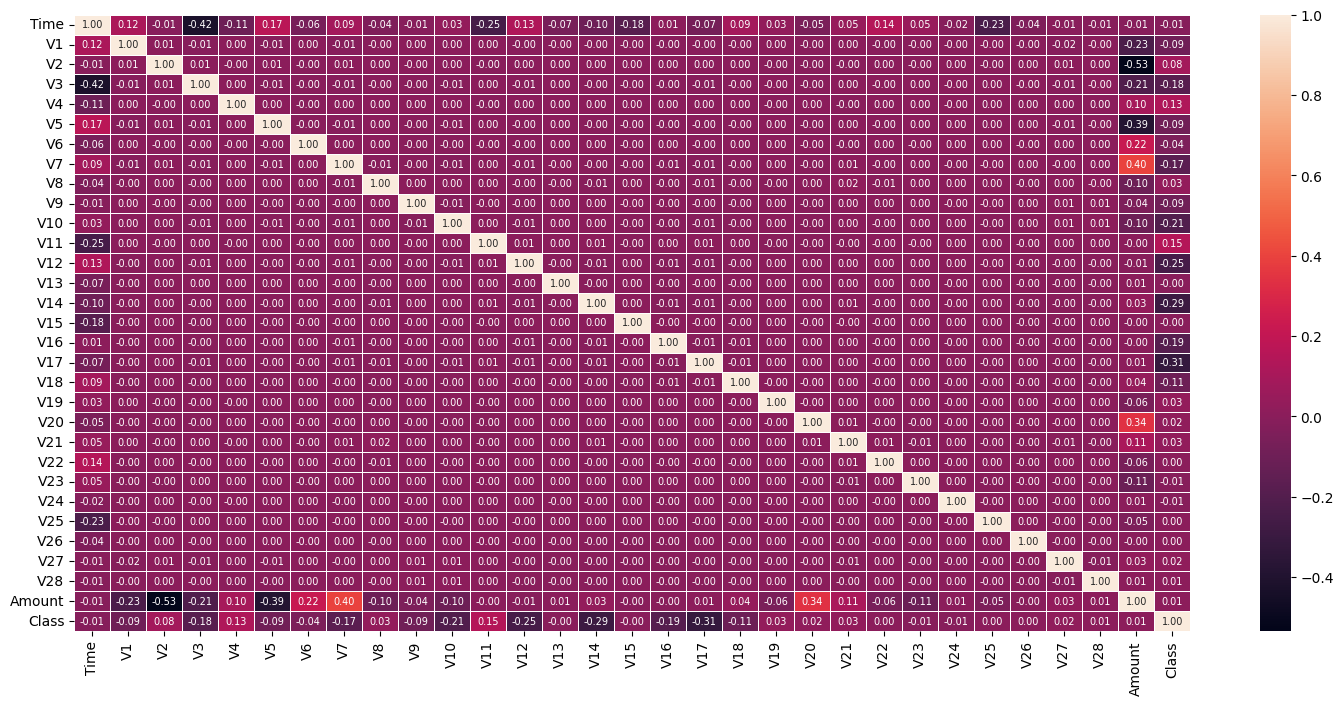

In [12]:
corrmat = creditCardData.corr()
fig = plt.figure(figsize = (18,8))
sea.heatmap(corrmat, annot = True, fmt = '.2f', linewidth = 0.5, annot_kws = {'size' : 7})
plt.show()

In [13]:
independentFeatures = creditCardData.drop(columns = 'Class')

#calculating variance inflation factors
def calVIF(independentFeatures):
    vifData = pd.DataFrame()
    vifData['Features'] = independentFeatures.columns
    vifData['VIF'] = [variance_inflation_factor(independentFeatures.values, i) for i in range(independentFeatures.shape[1])]
    return vifData
result = calVIF(independentFeatures)
print(result)

   Features        VIF
0      Time   2.352783
1        V1   1.624955
2        V2   3.903164
3        V3   1.256154
4        V4   1.141139
5        V5   2.757256
6        V6   1.528109
7        V7   2.504461
8        V8   1.098777
9        V9   1.019334
10      V10   1.114508
11      V11   1.029512
12      V12   1.012571
13      V13   1.003473
14      V14   1.027096
15      V15   1.014514
16      V16   1.000847
17      V17   1.005537
18      V18   1.007009
19      V19   1.038012
20      V20   2.239605
21      V21   1.100434
22      V22   1.083646
23      V23   1.154552
24      V24   1.000682
25      V25   1.013613
26      V26   1.000516
27      V27   1.010059
28      V28   1.001721
29   Amount  11.650240


In [14]:
# displaying features with high variance inflation factor
highVIF = result[result["VIF"] > 5]
if not highVIF.empty:
    print("Features with high VIF:")
    print(highVIF)
else:
    print("No features with high VIF found.")

Features with high VIF:
   Features       VIF
29   Amount  11.65024


### Observation
 -  <i> Having a high Variance Inflation Factor (VIF) for the feature Amount (VIF = 11.65) indicates that it is highly correlated with other features in our dataset, which can lead to multicollinearity issues. </i>

## -> Visualizing and Correcting Outliers

In [15]:
creditCardData2 = creditCardData.copy() #A dataset for removing outliers that is suitable for non-robust algorithms....

In [16]:
columnNames = creditCardData2.drop(columns = "Class").columns  #getting independent column names....

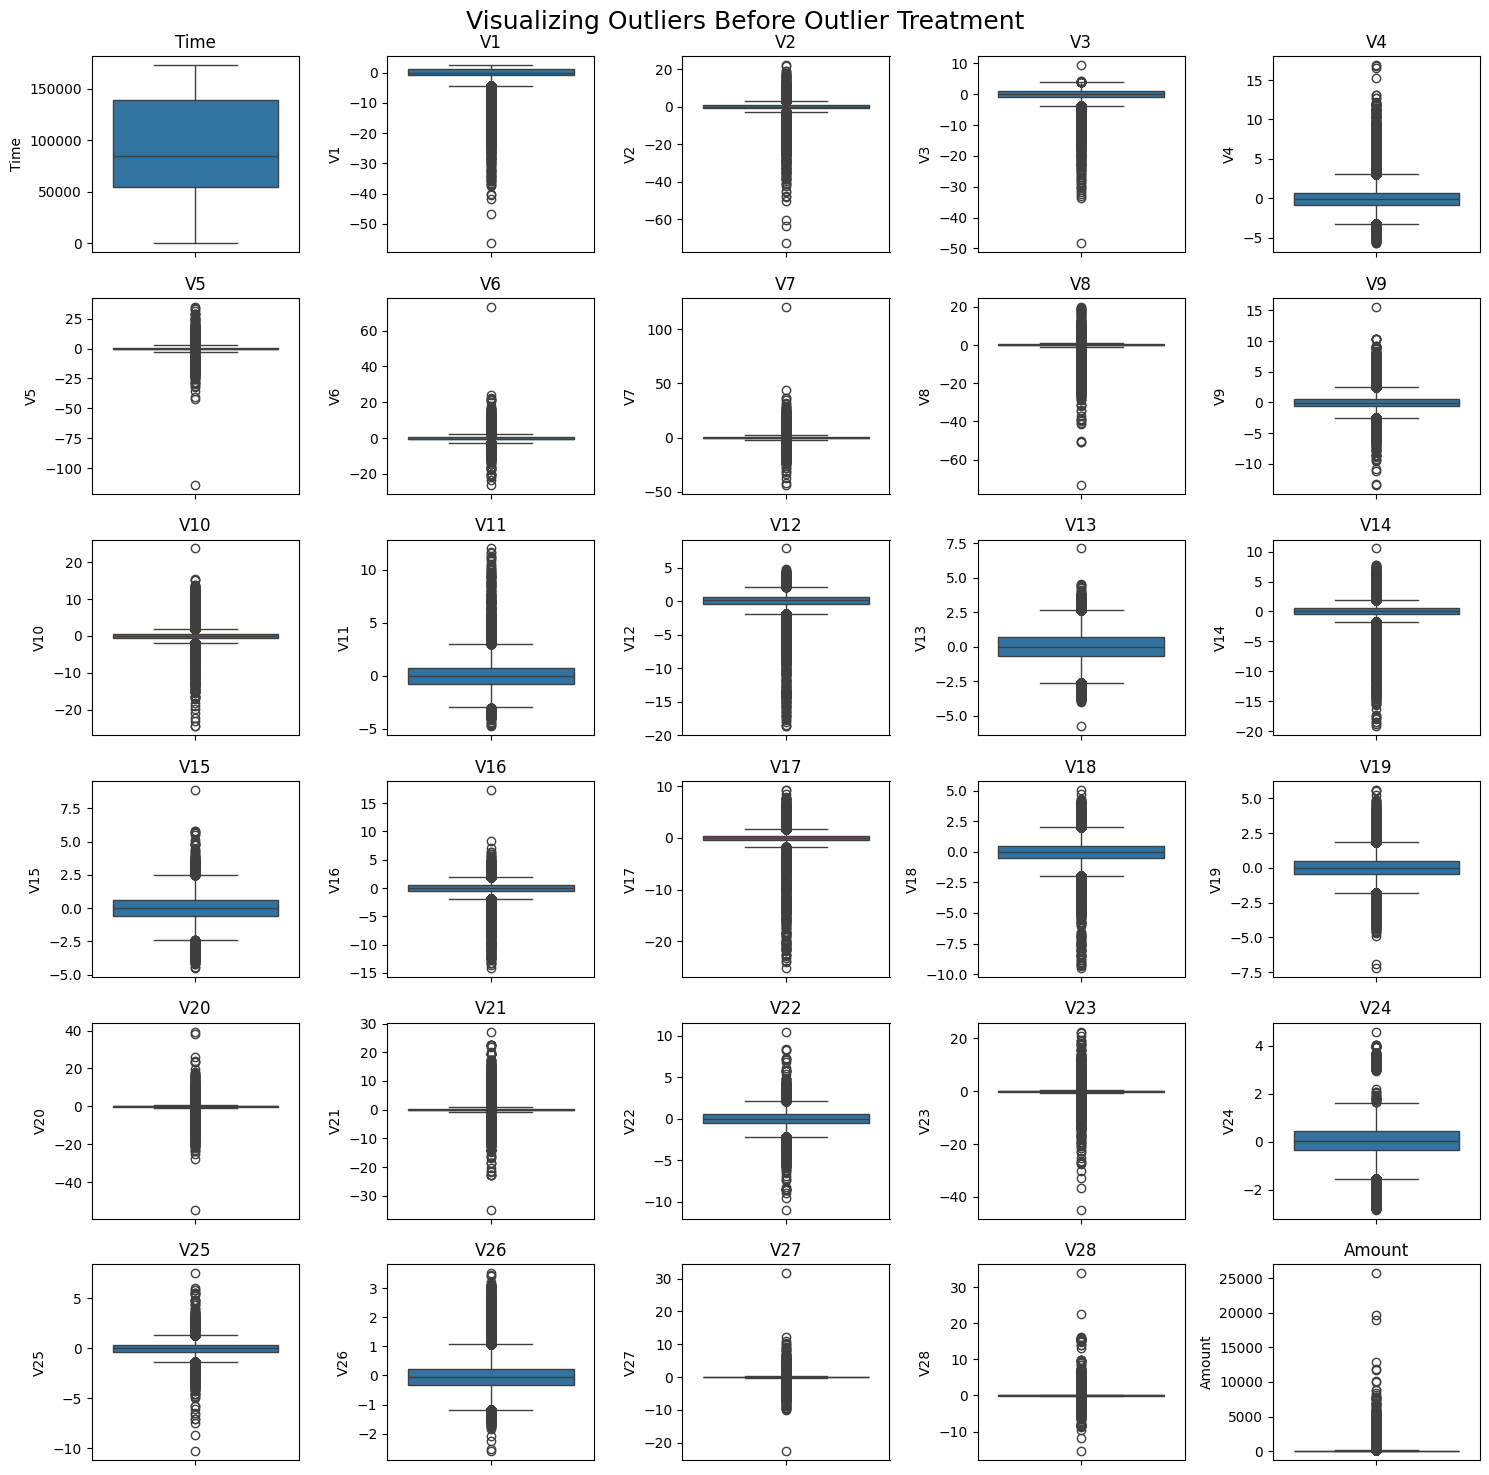

In [17]:
#Visualizing Outliers Before Outlier Treatment

fig, axes = plt.subplots(6,5, figsize = (15,15))
axes = axes.flatten()
i = 0
for col in columnNames:
    sea.boxplot(creditCardData2[col], ax = axes[i]) #Boxplot visualization represents outliers for each independent feature
    axes[i].set_title(col)
    i = i+1
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Visualizing Outliers Before Outlier Treatment", fontsize = 18)
plt.tight_layout()
plt.show()

In [18]:
outlierCount = {}

for col in columnNames:
    q1 = creditCardData2[col].quantile(0.25) # first quartile
    q3 = creditCardData2[col].quantile(0.75) # third quartile
    iqr = q3 - q1    # Inter-Quartile region
    # determining the lower and upper bounds
    lowerBound = q1 - (1.5 * iqr)
    upperBound = q3 + (1.5 * iqr)  
    outlierCount[col] = creditCardData2[(creditCardData2[col] < lowerBound) | (creditCardData2[col] > upperBound)].shape[0] #counting outliers
print(outlierCount)

{'Time': 0, 'V1': 6948, 'V2': 13390, 'V3': 3306, 'V4': 11094, 'V5': 12221, 'V6': 22886, 'V7': 8839, 'V8': 23904, 'V9': 8199, 'V10': 9345, 'V11': 735, 'V12': 15282, 'V13': 3362, 'V14': 14060, 'V15': 2884, 'V16': 8180, 'V17': 7353, 'V18': 7468, 'V19': 10150, 'V20': 27553, 'V21': 14401, 'V22': 1298, 'V23': 18467, 'V24': 4758, 'V25': 5333, 'V26': 5665, 'V27': 38799, 'V28': 30094, 'Amount': 31685}


In [19]:
#caping and flooring outliers through winsorization
for col in columnNames:
    q1 = creditCardData2[col].quantile(0.25)
    q3 = creditCardData2[col].quantile(0.75)
    iqr = q3 - q1
    lowerBound = q1 - (1.5 * iqr)
    upperBound = q3 + (1.5 * iqr)
    
    # Capping and flooring outliers
    creditCardData2[col] = creditCardData2[col].clip(lower = lowerBound, upper = upperBound)

# Print summary statistics
print(f"Total Number of Records before Outlier handling: {len(creditCardData)}")
print(f"Total Number of Records After Outlier handling: {len(creditCardData2)}")

Total Number of Records before Outlier handling: 283726
Total Number of Records After Outlier handling: 283726


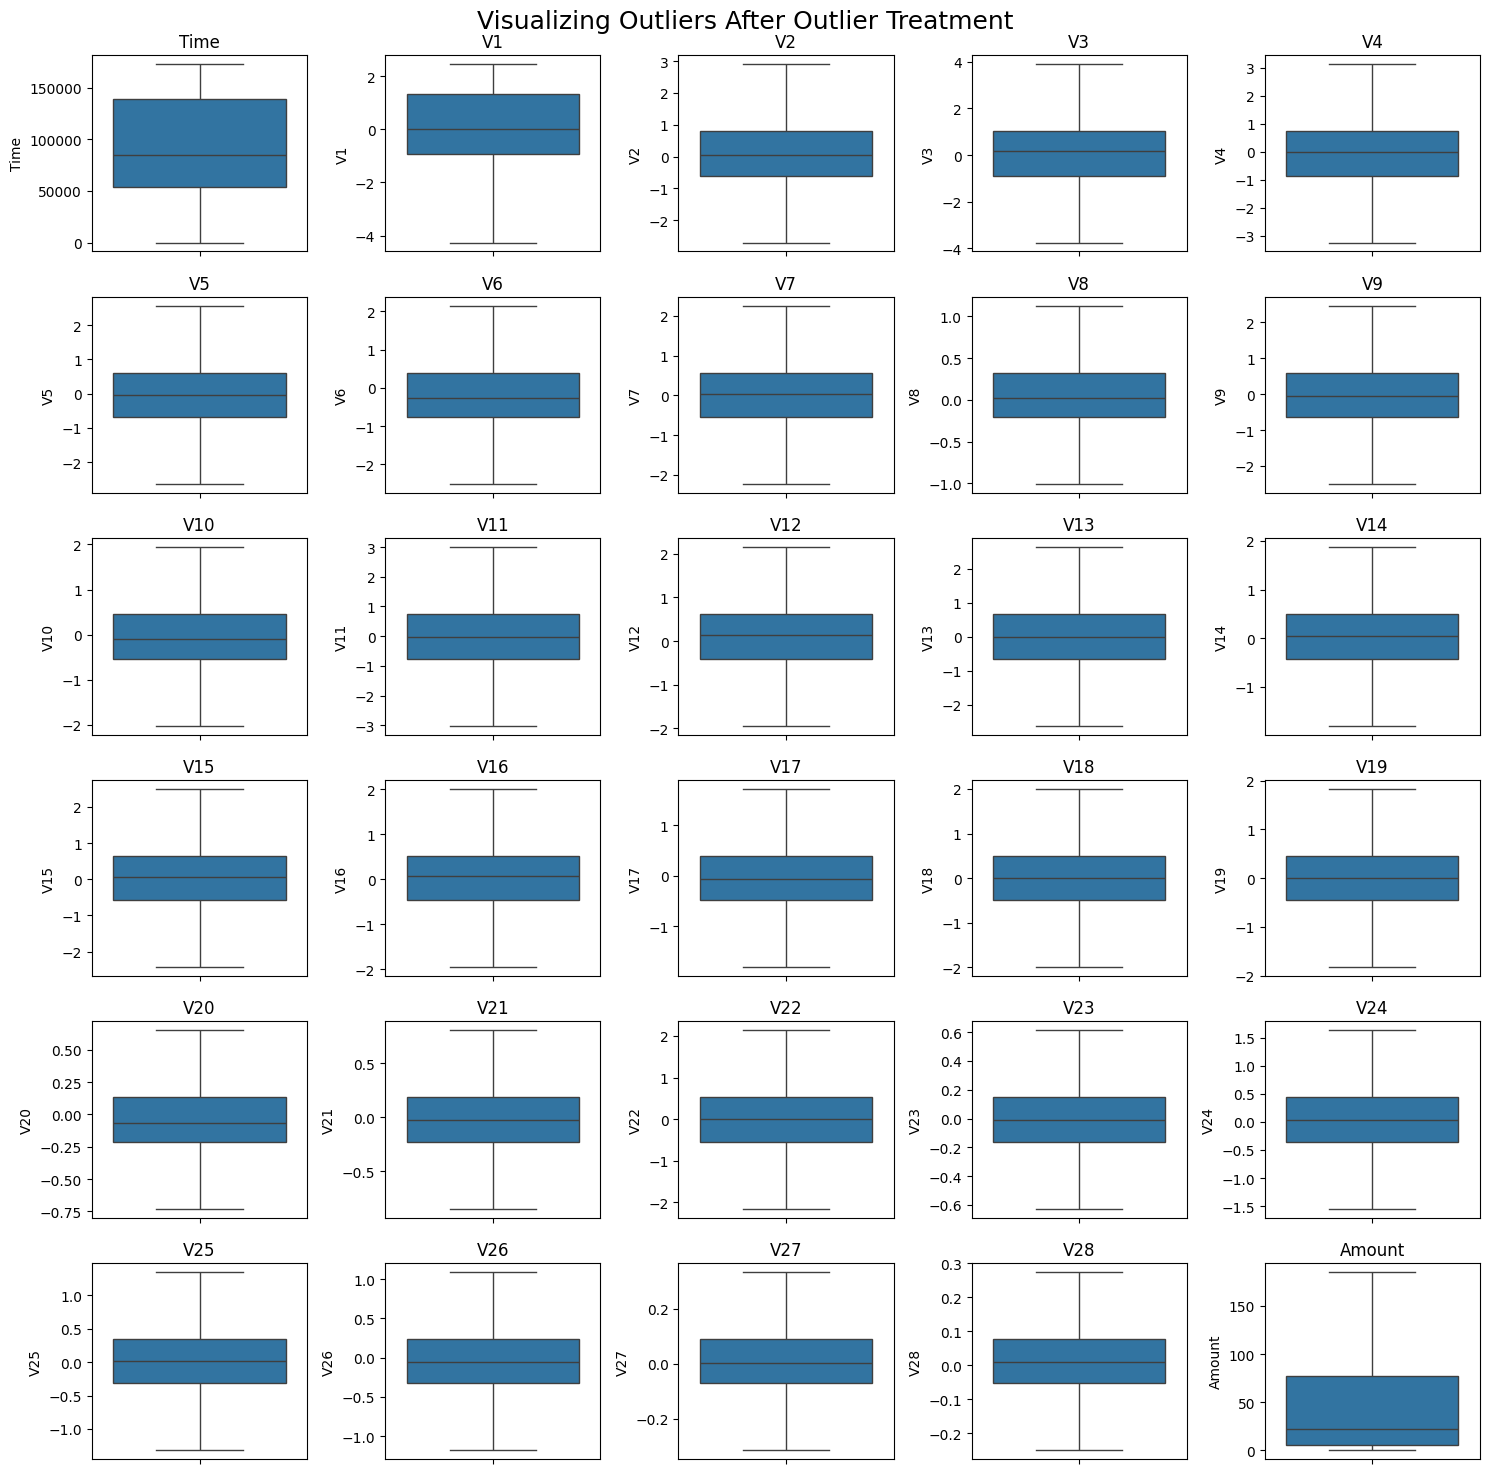

In [20]:
# Visualizing Outliers After Outlier Treatment

fig, axes = plt.subplots(6, 5, figsize = (15,15))
axes = axes.flatten()
i=0
for col in columnNames:
    sea.boxplot(creditCardData2[col], ax = axes[i]) #Boxplot visualization represents outliers for each independent feature
    axes[i].set_title(col)
    i = i+1
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Visualizing Outliers After Outlier Treatment", fontsize = 18)
plt.tight_layout()
plt.show()

### Observation
- <i> Outliers are capped and floored using Winsorization, which replaces extreme values with the nearest valid observations based on the Interquartile Range (IQR), preserving all records in the dataset. </i>

- <i> This approach prevents significant loss of information that can occur when outliers are removed, ensuring valid variations in the data are retained, especially in contexts like financial transactions. </i>

- <i> By mitigating the influence of extreme values, Winsorization improves the stability of statistical estimates and enhances model performance, allowing for better generalization and more reliable analyses. </i>

## -> Visualizing Skewness and Treatment Approaches for the Dataset 'creditCardData2'

In [21]:
columnNames = creditCardData2.drop(columns = "Class").columns  #getting independent column names....

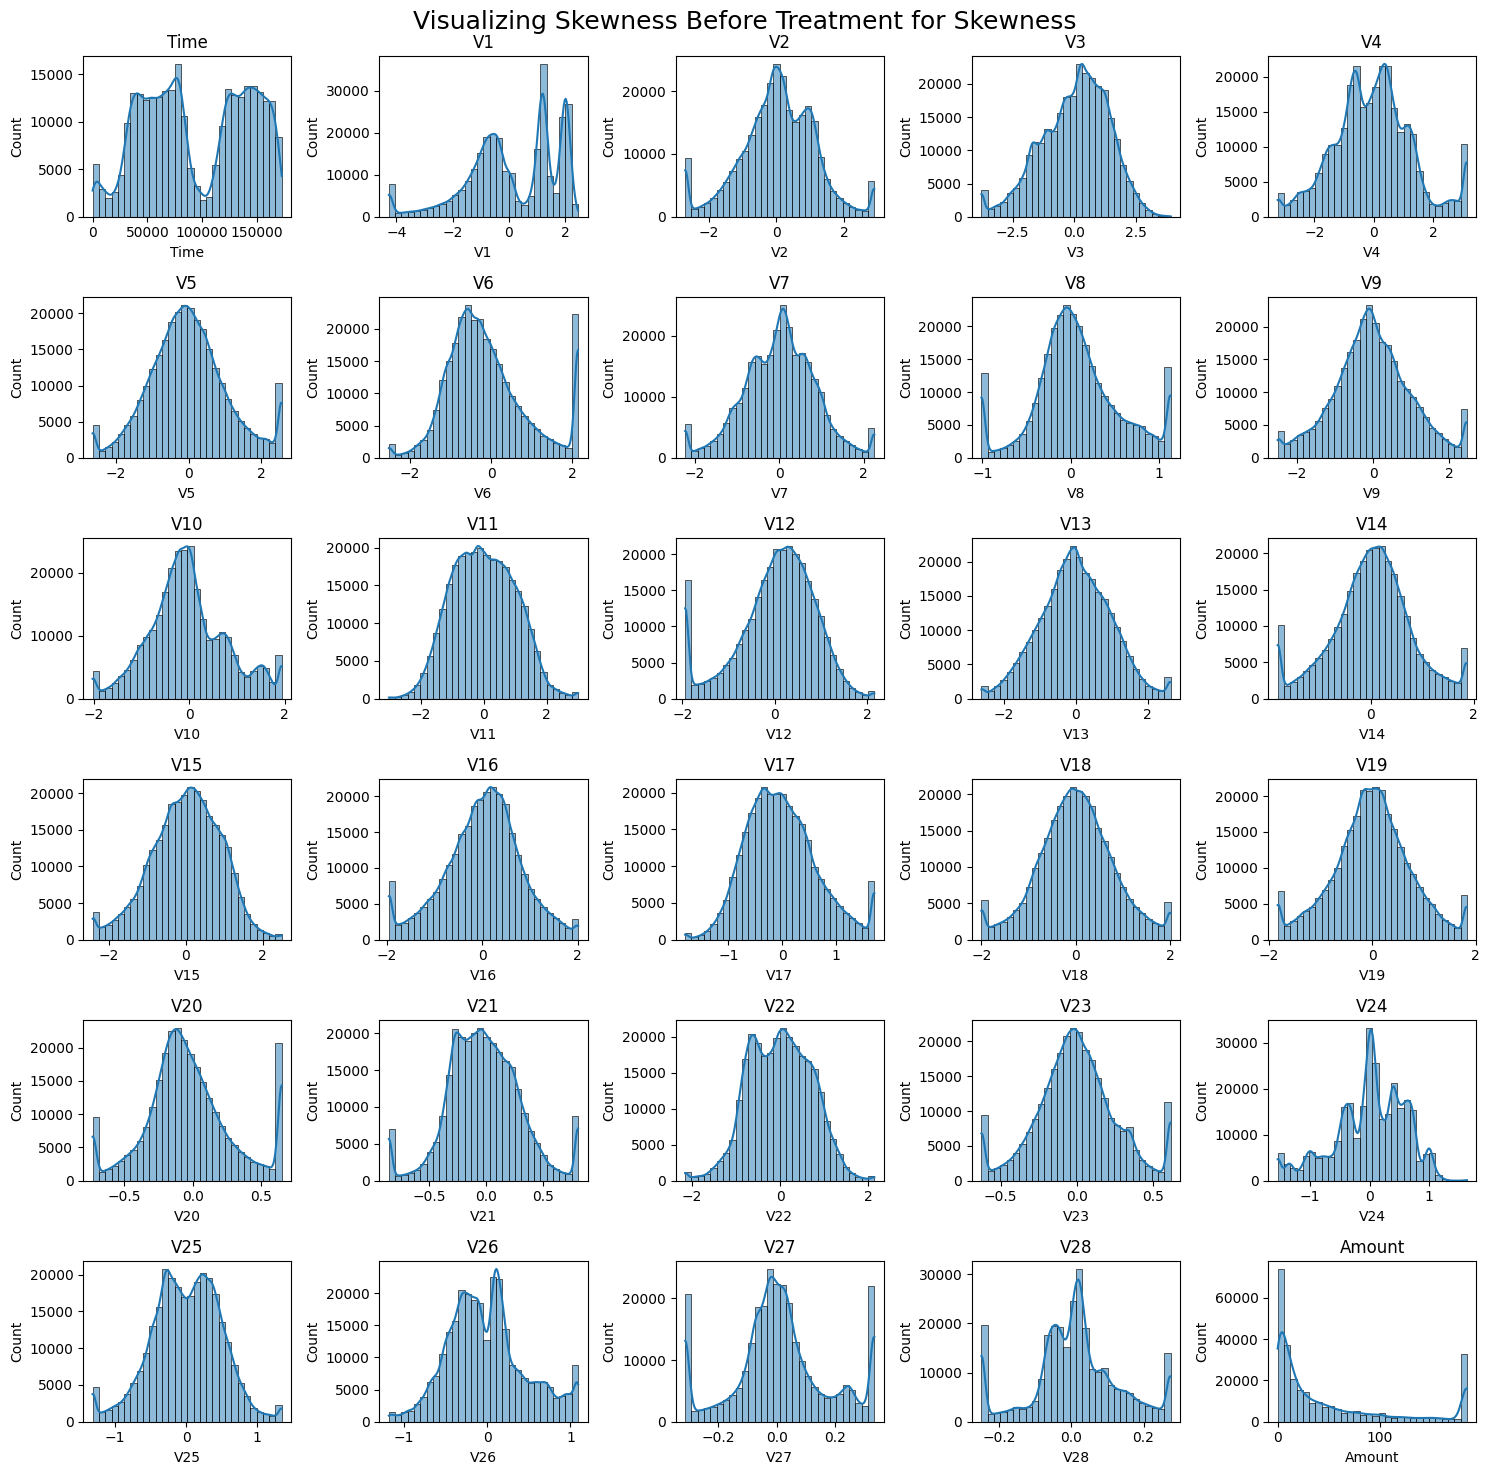

In [22]:
fig, axes = plt.subplots(6, 5, figsize = (15, 15))
axes = axes.flatten()
i = 0

for col in columnNames:
    sea.histplot(creditCardData2[col], ax = axes[i], bins = 30, kde = True)  # Histogram with Kernel Density Estimator
    axes[i].set_title(col)
    i += 1
    
# Remove any unused axes
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Visualizing Skewness Before Treatment for Skewness", fontsize = 18)
plt.tight_layout()
plt.show()

In [23]:
skewValues = creditCardData2.drop(columns = "Class").skew()
skewValues

Time     -0.035581
V1       -0.642270
V2       -0.139176
V3       -0.403793
V4        0.184787
V5        0.228502
V6        0.665435
V7       -0.060739
V8        0.151892
V9        0.099859
V10       0.242229
V11       0.104856
V12      -0.569182
V13       0.039082
V14      -0.102652
V15      -0.262597
V16      -0.231331
V17       0.444719
V18       0.011311
V19      -0.036423
V20       0.289852
V21       0.121915
V22      -0.035928
V23       0.062001
V24      -0.543730
V25      -0.156094
V26       0.367262
V27       0.086288
V28      -0.032022
Amount    1.211286
dtype: float64

In [24]:
skewnessCategory = {'Skew Ignorable' : [], 'Moderately Skewed' : [], 'Highly Skewed' : []}
for i in range(30):
    val = skewValues[i]
    col = skewValues.index[i]
    if (val > -0.5 and  val < 0.5):
        skewnessCategory['Skew Ignorable'].append(col+'>'+str(val))
    elif (val <= -0.5 and  val > -1) or (val < 1 and  val >= 0.5):
        skewnessCategory['Moderately Skewed'].append(col+'>'+str(val))
    elif (val < -1) or (val > 1):
        skewnessCategory['Highly Skewed'].append(col+'>'+str(val))
print('Normally Skewed : ', skewnessCategory['Skew Ignorable'])

print('\n###########################################################################################################################################\n')

print('Moderately Skewed : ', skewnessCategory['Moderately Skewed'])

print('\n###########################################################################################################################################\n')

print('Highly Skewed : ', skewnessCategory['Highly Skewed'])

Normally Skewed :  ['Time>-0.03558064623598194', 'V2>-0.13917605448066744', 'V3>-0.40379345607664974', 'V4>0.18478736105874785', 'V5>0.22850217082633106', 'V7>-0.06073882726005178', 'V8>0.15189214221375674', 'V9>0.09985921435199259', 'V10>0.24222917836209407', 'V11>0.1048557713499749', 'V13>0.039082256021839346', 'V14>-0.1026523006570933', 'V15>-0.2625970477476933', 'V16>-0.23133088642676608', 'V17>0.4447191739975476', 'V18>0.011311211023413304', 'V19>-0.03642258810525028', 'V20>0.28985167652827665', 'V21>0.1219151288966932', 'V22>-0.03592794510950396', 'V23>0.062001483043367986', 'V25>-0.15609387431622848', 'V26>0.36726203574185035', 'V27>0.08628787887533639', 'V28>-0.0320216360869189']

###########################################################################################################################################

Moderately Skewed :  ['V1>-0.6422697094679122', 'V6>0.6654349292306918', 'V12>-0.569181640502082', 'V24>-0.543729831578428']

###################################

In [25]:
creditCardData2['Amount'] = np.log1p(creditCardData2['Amount'].values) # log transformation for positive skewness in the feature "Amount"
creditCardData2.Amount.skew()

-0.18262291943344178

In [26]:
pt = PowerTransformer(method='yeo-johnson')

creditCardData2['V6'] = pt.fit_transform(creditCardData2[['V6']]) # yeo-johnson transformation for positive skewness in the feature "V6"...
creditCardData2.V6.skew()

-0.07316801005886413

In [27]:
for col in ['V1', 'V12', 'V24']:
    creditCardData2[col] = pt.fit_transform(creditCardData2[[col]]) # yeo-johnson transformation for negative skewness...
    print(f"Skewness in the feature {col} : {creditCardData2[col].skew()}")

Skewness in the feature V1 : -0.1470536320968228
Skewness in the feature V12 : 0.02811809162149551
Skewness in the feature V24 : -0.013911242666280719


In [28]:
skewValues = creditCardData2.drop(columns = "Class").skew()
skewValues

Time     -0.035581
V1       -0.147054
V2       -0.139176
V3       -0.403793
V4        0.184787
V5        0.228502
V6       -0.073168
V7       -0.060739
V8        0.151892
V9        0.099859
V10       0.242229
V11       0.104856
V12       0.028118
V13       0.039082
V14      -0.102652
V15      -0.262597
V16      -0.231331
V17       0.444719
V18       0.011311
V19      -0.036423
V20       0.289852
V21       0.121915
V22      -0.035928
V23       0.062001
V24      -0.013911
V25      -0.156094
V26       0.367262
V27       0.086288
V28      -0.032022
Amount   -0.182623
dtype: float64

In [29]:
skewnessCategory = {'Skew Ignorable' : [], 'Moderately Skewed' : [], 'Highly Skewed' : []}
for i in range(30):
    val = skewValues[i]
    col = skewValues.index[i]
    if (val > -0.5 and  val < 0.5):
        skewnessCategory['Skew Ignorable'].append(col+'>'+str(val))
    elif (val <= -0.5 and  val > -1) or (val < 1 and  val >= 0.5):
        skewnessCategory['Moderately Skewed'].append(col+'>'+str(val))
    elif (val < -1) or (val > 1):
        skewnessCategory['Highly Skewed'].append(col+'>'+str(val))
print('Normally Skewed : ', skewnessCategory['Skew Ignorable'])

print('\n###########################################################################################################################################\n')

print('Moderately Skewed : ', skewnessCategory['Moderately Skewed'])

print('\n###########################################################################################################################################\n')

print('Highly Skewed : ', skewnessCategory['Highly Skewed'])

Normally Skewed :  ['Time>-0.03558064623598194', 'V1>-0.1470536320968228', 'V2>-0.13917605448066744', 'V3>-0.40379345607664974', 'V4>0.18478736105874785', 'V5>0.22850217082633106', 'V6>-0.07316801005886413', 'V7>-0.06073882726005178', 'V8>0.15189214221375674', 'V9>0.09985921435199259', 'V10>0.24222917836209407', 'V11>0.1048557713499749', 'V12>0.02811809162149551', 'V13>0.039082256021839346', 'V14>-0.1026523006570933', 'V15>-0.2625970477476933', 'V16>-0.23133088642676608', 'V17>0.4447191739975476', 'V18>0.011311211023413304', 'V19>-0.03642258810525028', 'V20>0.28985167652827665', 'V21>0.1219151288966932', 'V22>-0.03592794510950396', 'V23>0.062001483043367986', 'V24>-0.013911242666280719', 'V25>-0.15609387431622848', 'V26>0.36726203574185035', 'V27>0.08628787887533639', 'V28>-0.0320216360869189', 'Amount>-0.18262291943344178']

###########################################################################################################################################

Moderately Skewed :  

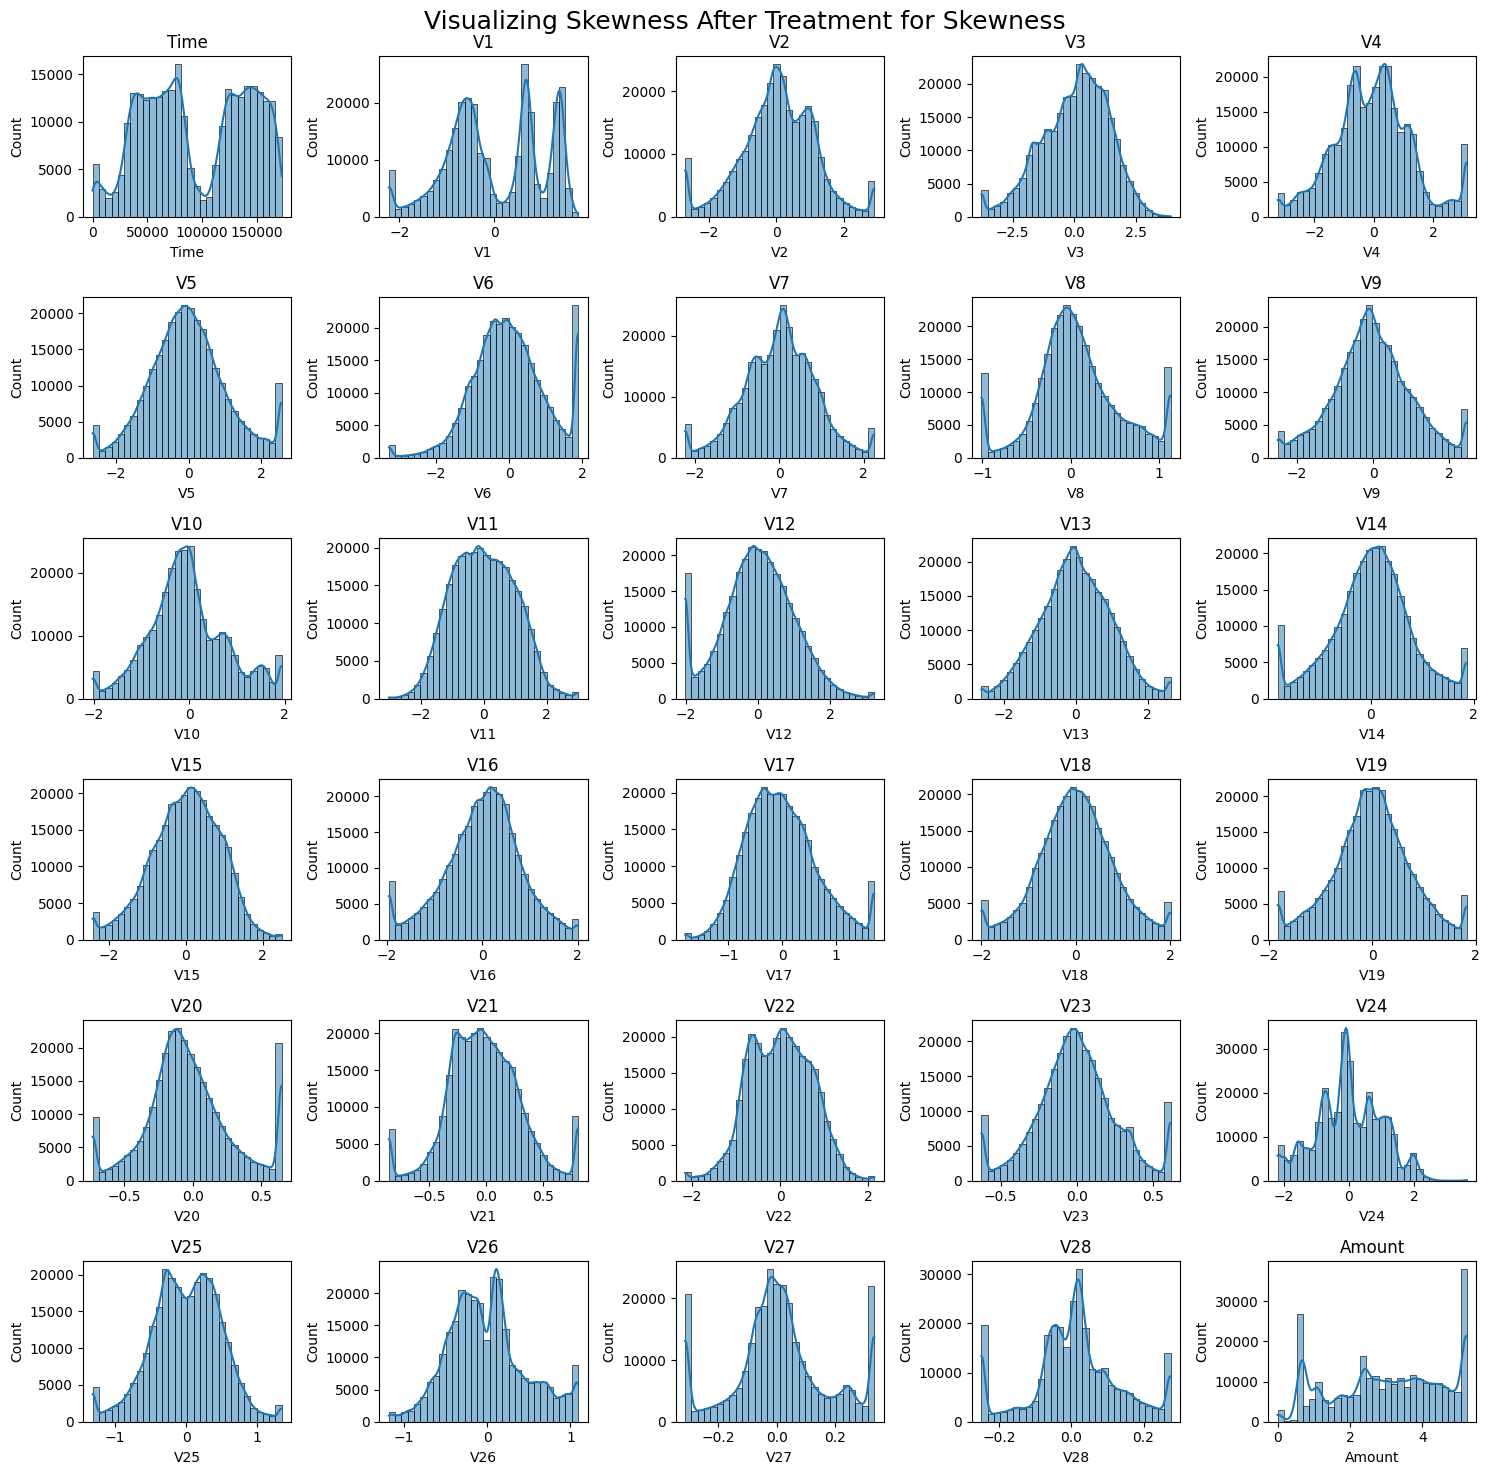

In [30]:
columnNames = creditCardData2.drop(columns = "Class").columns  # Getting rid of target variable
fig, axes = plt.subplots(6, 5, figsize = (15, 15))
axes = axes.flatten()
i = 0

for col in columnNames:
    sea.histplot(creditCardData2[col], ax = axes[i], bins = 30, kde = True)  # Histogram with Kernel Density Estimator
    axes[i].set_title(col)
    i += 1
    
# Remove any unused axes
for j in range(i, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Visualizing Skewness After Treatment for Skewness", fontsize = 18)
plt.tight_layout()
plt.show()

## -> Checking the Variance Inflation Factor for creditCardData2 to examine multicollinearity

In [31]:
independentFeatures = creditCardData2.drop(columns = 'Class')

#calculating variance inflation factors
def calVIF(independentFeatures):
    vifData = pd.DataFrame()
    vifData['Features'] = independentFeatures.columns
    vifData['VIF'] = [variance_inflation_factor(independentFeatures.values, i) for i in range(independentFeatures.shape[1])]
    return vifData
result = calVIF(independentFeatures)
print(result)

   Features       VIF
0      Time  5.013931
1        V1  1.721416
2        V2  1.705599
3        V3  1.745362
4        V4  1.285285
5        V5  1.570408
6        V6  1.306644
7        V7  2.045718
8        V8  1.531074
9        V9  1.280280
10      V10  1.765007
11      V11  1.327413
12      V12  1.840639
13      V13  1.064605
14      V14  1.544072
15      V15  1.056849
16      V16  1.664804
17      V17  2.270022
18      V18  1.282490
19      V19  1.086489
20      V20  1.360133
21      V21  1.563681
22      V22  1.446818
23      V23  1.374291
24      V24  1.034345
25      V25  1.270342
26      V26  1.022580
27      V27  1.400032
28      V28  1.433926
29   Amount  4.839746


### Observation
- <i> Overall, the VIF values suggest that there’s some multicollinearity, it may not be significant enough to warrant immediate action. </i>
- <i> There is some degree of multicollinearity present in our dataset, particularly with the "Time" and "Amount" variables. However, the levels of multicollinearity indicated by the VIF values (generally below 5 and only slightly above for a couple of variables) are not severe enough to cause major issues with our analytics. </i>

# Balancing Dataset

#### <b> This Dataset is highly imbalanced </b>

- 0 --> legitimate Transaction

- 1 --> fraudulent transaction

### creditCardData
- <i> This Dataset has not undergone outlier treatment and skewness treatment</i>.
- <i> This is applicable for only robust machine    learning algorithms such as Decision Trees and Random Forest. </i>

### creditCardData2 
- <i> This Dataset has undergone both outlier treatment and skewness treatment. </i>
- <i> This is suitable for the algorithms such as Logistic Regression, Support Vector Machines, and K-Nearest Neighbors. </i>

Class
0    283253
1       473
Name: count, dtype: int64

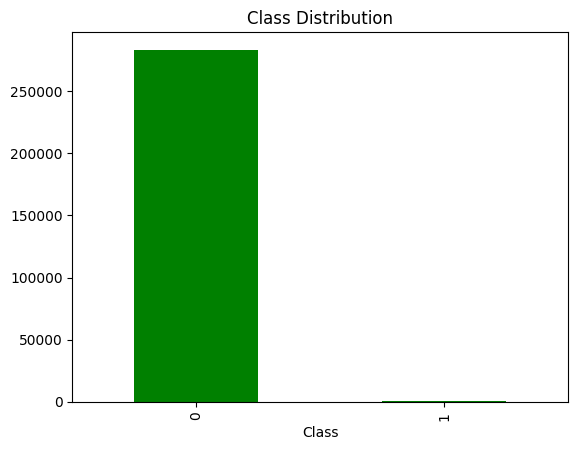

In [32]:
creditCardData['Class'].value_counts().plot(kind = "bar", color = "g", title = "Class Distribution")
creditCardData['Class'].value_counts()

## -> UnderSampling & OverSampling creditCardData

#### UnderSampling creditCardData

In [33]:
legitData = creditCardData[creditCardData['Class'] == 0].reset_index(drop=True)
fraudData = creditCardData[creditCardData['Class'] == 1].reset_index(drop=True)

In [34]:
description = {'legitData': legitData.Amount.describe(),
              'fraudData': fraudData.Amount.describe()}
pd.DataFrame(description)

,legitData,fraudData
count,283253.000000,473.000000
mean,88.413575,123.871860
std,250.379023,260.211041
min,0.000000,0.000000
25%,5.670000,1.000000
50%,22.000000,9.820000
75%,77.460000,105.890000
max,25691.160000,2125.870000


In [35]:
legitSample = legitData.sample(n = 473, random_state = 18)
underSampledData = pd.concat([legitSample,fraudData], axis = 0)
# Shuffling the combined dataset to mix legit and fraud entries
underSampledData = underSampledData.sample(frac=1, random_state=18).reset_index(drop = True)
underSampledData[:18]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1
1,100298.0,-22.341889,15.536133,-22.865228,7.043374,-14.183129,-0.463145,-28.215112,-14.607791,-9.481456,...,-9.110423,4.158895,1.412928,0.382801,0.447154,-0.632816,-4.380154,-0.467863,1.00,1
2,150494.0,1.852889,1.069593,-1.776101,4.617410,0.770413,-0.400859,-0.040970,0.089510,-0.217705,...,-0.157869,-0.176244,0.027437,-0.468006,0.058063,0.148263,0.042278,0.040573,1.00,1
3,62059.0,-1.644403,3.129852,-2.576977,3.415573,-0.448525,-1.241893,-1.991652,1.002665,-2.809071,...,0.417762,-0.648576,-0.318617,-0.680413,0.389869,0.055750,0.394682,0.298821,6.62,1
4,129308.0,0.054682,1.856500,-4.075451,4.100098,-0.800931,-0.292502,-2.317431,1.189747,-0.786238,...,0.618248,0.800932,0.130016,0.288946,-0.366658,0.030307,0.431182,0.110698,80.90,1
5,141328.0,1.968745,-0.222145,-1.301103,0.491177,0.077103,-0.724714,0.175615,-0.213076,0.579009,...,-0.266156,-0.812256,0.322775,0.709962,-0.270088,-0.020116,-0.075024,-0.042783,52.96,0
6,3539.0,1.204251,0.160999,0.607058,0.558653,-0.579199,-0.800906,-0.081854,-0.034532,-0.130362,...,-0.200307,-0.646944,0.157874,0.512553,0.138464,0.066735,-0.036676,0.009364,0.89,0
7,165009.0,-2.893898,-1.044533,1.710436,-0.853603,-0.527809,-0.582606,-1.218138,0.544374,0.887336,...,0.227163,0.759738,-0.262655,0.097397,-0.024604,0.891591,-0.780783,0.423104,0.05,0
8,62341.0,-5.267760,2.506719,-5.290925,4.886134,-3.343188,-1.100085,-5.810509,1.726343,-0.749277,...,0.764266,0.473262,0.548482,-0.156850,-0.710187,-0.366423,-1.486766,0.677664,1.10,1
9,29785.0,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,...,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,1


Class
1    473
0    473
Name: count, dtype: int64

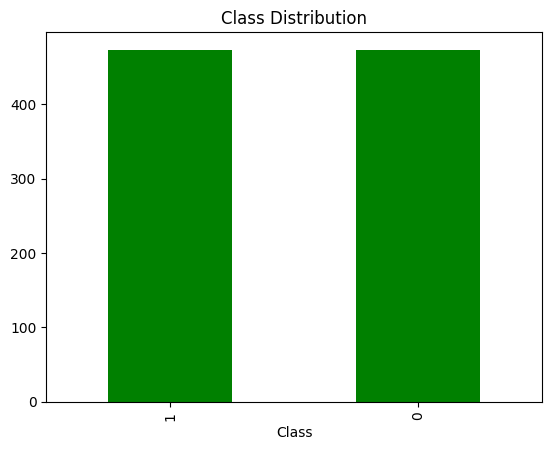

In [36]:
underSampledData['Class'].value_counts().plot(kind = "bar", color = "g", title = "Class Distribution")
underSampledData['Class'].value_counts()

#### OverSampling creditCardData

In [37]:
X = creditCardData.drop(columns = 'Class', axis = 1)
Y = creditCardData[['Class']]

##### Performing SMOTE
- <i> SMOTE  - Synthetic Minority Over-Sampling Technique. </i>
- <i> It generates synthetic examples for the minority class by interpolating between existing minority class examples. </i>

In [38]:
syntheticMinorOversample = SMOTE()
X_smote1, Y_smote1 = syntheticMinorOversample.fit_resample(X, Y)
Y_smote1.value_counts()

Class
0        283253
1        283253
Name: count, dtype: int64

In [39]:
overSampledData = pd.concat([X_smote1, Y_smote1], axis=1).reset_index(drop=True)

In [40]:
overSampledData = overSampledData.sample(frac = 1, random_state = 42).reset_index(drop = True)
overSampledData.tail(18)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
566488,133122.000000,2.273385,-1.714390,-0.162276,-1.569735,-1.819208,0.067701,-1.969638,0.184092,-0.333346,...,-0.190626,-0.072496,0.368571,0.403174,-0.533328,-0.257233,0.053536,-0.029804,8.000000,0
566489,123726.183077,-5.288070,4.067849,-7.855854,6.834993,-4.468161,-1.172922,-6.957319,3.667902,-4.915397,...,1.557494,1.023816,-0.181117,0.056221,-0.034537,0.536078,-0.997239,-1.031314,44.848198,1
566490,8036.080578,-1.729655,3.364533,-3.908005,2.552679,-1.821601,-2.500770,-3.453083,1.440950,-0.893512,...,0.466905,-0.569219,0.012761,0.221298,0.065686,0.310116,0.458650,0.213689,1.000000,1
566491,51422.000000,-1.726503,-0.804360,2.294159,-0.684581,0.410483,-0.376471,-0.201318,0.182111,0.579642,...,-0.062476,-0.120093,0.091675,0.185480,-0.128871,0.795314,-0.155544,0.290010,77.500000,0
566492,143218.690431,-3.050043,1.777551,-4.426549,4.433834,-0.437691,-1.401550,-3.711284,1.733662,-2.953663,...,0.748936,0.131542,0.054812,-0.259330,-0.162154,-0.255999,0.710670,0.126127,53.123764,1
566493,40618.000000,-1.854477,0.137636,1.132344,-0.305264,-0.067457,-1.066114,0.353902,0.384434,-0.710620,...,0.244159,0.291745,-0.349808,0.570033,0.125040,0.224316,-0.143381,-0.133285,89.000000,0
566494,168716.000000,2.048629,-0.367489,-2.544065,-0.728472,2.387380,3.318407,-0.477692,0.791276,0.403246,...,-0.292703,-0.835377,0.380780,0.698235,-0.265199,0.219159,-0.052337,-0.066750,1.980000,0
566495,129509.000000,2.035265,-0.129772,-1.186158,0.216999,0.089187,-0.621148,0.045685,-0.129676,0.332480,...,-0.256076,-0.638997,0.297027,-0.400909,-0.305986,0.204722,-0.072913,-0.074582,0.890000,0
566496,122528.000000,-0.046080,0.458484,0.513286,-1.375850,-0.074346,-1.100047,0.323441,-0.166957,-1.153021,...,-0.314936,-0.849448,0.136970,-0.088633,-0.367021,-0.592856,0.303675,0.124990,19.950000,0
566497,61858.000000,-0.436164,-0.914009,1.237963,-1.415268,-1.264601,0.173095,0.069570,0.058376,-2.926778,...,-0.044291,-0.117529,0.493092,-0.036586,-0.513566,-0.255538,0.110599,0.146744,193.000000,0


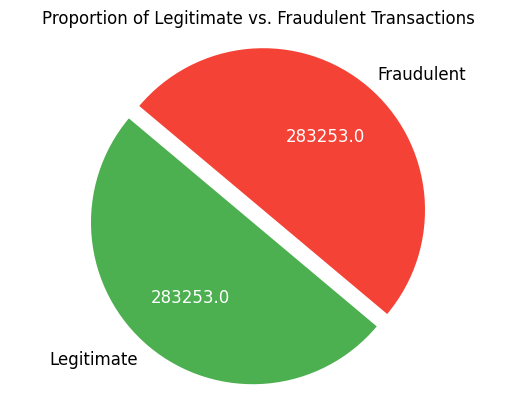

In [41]:
labels = ['Legitimate', 'Fraudulent']
sizes = overSampledData[['Class']].value_counts()
colors = ['#4CAF50', '#F44336']
explode = (0, 0.1)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct=lambda pct: (pct / 100. * sum(sizes)), 
    startangle=140
)

for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

ax.axis('equal')

plt.title('Proportion of Legitimate vs. Fraudulent Transactions')
plt.show()

## -> UnderSampling & OverSampling creditCardData2

#### UnderSampling creditCardData2

In [42]:
legitData = creditCardData2[creditCardData2['Class'] == 0].reset_index(drop=True)
fraudData = creditCardData2[creditCardData2['Class'] == 1].reset_index(drop=True)

In [43]:
description = {'legitData': legitData.Amount.describe(),
              'fraudData': fraudData.Amount.describe()}
pd.DataFrame(description)

,legitData,fraudData
count,283253.000000,473.000000
mean,3.070284,2.677885
std,1.509603,1.975262
min,0.000000,0.000000
25%,1.897620,0.693147
50%,3.135494,2.381396
75%,4.362589,4.671800
max,5.227761,5.227761


In [44]:
legitSample = legitData.sample(n = 473, random_state = 18)
underSampledData2 = pd.concat([legitSample, fraudData], axis = 0)
# Shuffling the combined dataset to mix legit and fraud entries
underSampledData2 = underSampledData2.sample(frac=1, random_state=18).reset_index(drop = True)
underSampledData2[:18]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,47982.0,-0.892439,2.244119,-1.703826,1.492536,-1.192985,-1.941105,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.787499,-0.218725,0.302809,0.333982,0.250134,0.565314,1
1,100298.0,-2.220388,2.901188,-3.764645,3.124319,-2.642901,-0.266834,-2.236984,-1.010627,-2.504517,...,-0.850053,2.134663,0.611926,0.598408,0.447154,-0.632816,-0.313414,-0.249459,0.693147,1
2,150494.0,1.226344,1.069593,-1.776101,3.124319,0.770413,-0.193654,-0.040970,0.089510,-0.217705,...,-0.157869,-0.176244,0.027437,-0.849652,0.058063,0.148263,0.042278,0.040573,0.693147,1
3,62059.0,-1.095011,2.901188,-2.576977,3.124319,-0.448525,-1.285019,-1.991652,1.002665,-2.504517,...,0.417762,-0.648576,-0.318617,-1.142584,0.389869,0.055750,0.333982,0.274917,2.030776,1
4,129308.0,-0.165646,1.856500,-3.764645,3.124319,-0.800931,-0.069608,-2.236984,1.127502,-0.786238,...,0.618248,0.800932,0.130016,0.412050,-0.366658,0.030307,0.333982,0.110698,4.405499,1
5,141328.0,1.328020,-0.222145,-1.301103,0.491177,0.077103,-0.588291,0.175615,-0.213076,0.579009,...,-0.266156,-0.812256,0.322775,1.296134,-0.270088,-0.020116,-0.075024,-0.042783,3.988243,0
6,3539.0,0.680580,0.160999,0.607058,0.558653,-0.579199,-0.686019,-0.081854,-0.034532,-0.130362,...,-0.200307,-0.646944,0.157874,0.866409,0.138464,0.066735,-0.036676,0.009364,0.636577,0
7,165009.0,-1.660037,-1.044533,1.710436,-0.853603,-0.527809,-0.410879,-1.218138,0.544374,0.887336,...,0.227163,0.759738,-0.262655,0.052318,-0.024604,0.891591,-0.313414,0.274917,0.048790,0
8,62341.0,-2.220388,2.506719,-3.764645,3.124319,-2.642901,-1.086418,-2.236984,1.127502,-0.749277,...,0.764266,0.473262,0.548482,-0.379889,-0.710187,-0.366423,-0.313414,0.274917,0.741937,1
9,29785.0,0.458222,0.344048,-2.880004,1.721680,-2.642901,-0.481427,-2.236984,1.127502,0.864065,...,0.807941,1.481271,0.611926,0.198284,-1.319714,-0.536517,0.333982,-0.049729,3.443618,1


Class
1    473
0    473
Name: count, dtype: int64

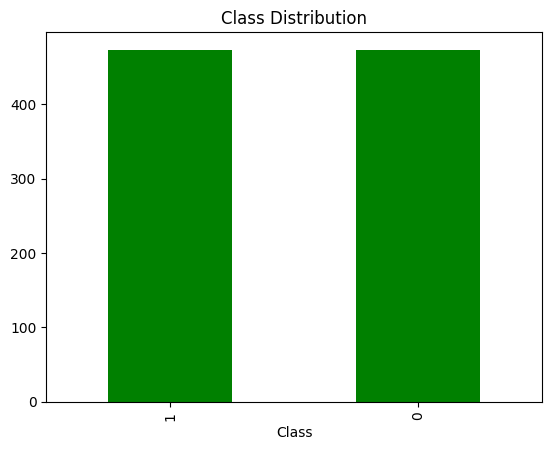

In [45]:
underSampledData2['Class'].value_counts().plot(kind = "bar", color = "g", title = "Class Distribution")
underSampledData2['Class'].value_counts()

#### OverSampling creditCardData2

In [46]:
X = creditCardData2.drop(columns = 'Class', axis = 1)
Y = creditCardData2[['Class']]

In [47]:
syntheticMinorOversample = SMOTE()

X_smote2, Y_smote2 = syntheticMinorOversample.fit_resample(X,Y)
Y_smote2.value_counts()

Class
0        283253
1        283253
Name: count, dtype: int64

In [48]:
overSampledData2 = pd.concat([X_smote2, Y_smote2], axis = 1).reset_index(drop=True)

In [49]:
overSampledData2 = overSampledData2.sample(frac = 1, random_state = 42).reset_index(drop = True)

overSampledData2.tail(18)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
566488,133122.000000,1.600922,-1.714390,-0.162276,-1.569735,-1.819208,0.310448,-1.969638,0.184092,-0.333346,...,-0.190626,-0.072496,0.368571,0.639703,-0.533328,-0.257233,0.053536,-0.029804,2.197225,0
566489,91987.749617,-0.717299,2.806478,-3.558908,2.683660,0.017005,-3.079698,-1.274416,0.752732,-0.529251,...,0.565535,0.782603,0.100255,-0.515735,-0.464050,-0.430073,0.133427,0.127852,2.546646,1
566490,13140.869630,-1.696842,2.901188,-3.764645,3.124319,-2.642901,-2.866956,-2.236984,1.127502,-2.504517,...,0.807941,0.304435,0.542278,-1.310840,-1.118039,0.496663,0.333982,0.274917,0.693147,1
566491,51422.000000,-1.134265,-0.804360,2.294159,-0.684581,0.410483,-0.165369,-0.201318,0.182111,0.579642,...,-0.062476,-0.120093,0.091675,0.214210,-0.128871,0.795314,-0.155544,0.274917,4.363099,0
566492,138900.411538,-0.992132,1.921153,-3.764645,1.368104,-0.369905,-0.087348,-1.986613,1.127502,-2.427424,...,0.807941,1.262173,-0.153942,-0.697852,0.075593,0.743394,0.333982,0.211008,0.706913,1
566493,40618.000000,-1.194765,0.137636,1.132344,-0.305264,-0.067457,-1.039663,0.353902,0.384434,-0.710620,...,0.244159,0.291745,-0.349808,0.988852,0.125040,0.224316,-0.143381,-0.133285,4.499810,0
566494,168716.000000,1.398816,-0.367489,-2.544065,-0.728472,2.387380,1.883912,-0.477692,0.791276,0.403246,...,-0.292703,-0.835377,0.380780,1.269892,-0.265199,0.219159,-0.052337,-0.066750,1.091923,0
566495,129509.000000,1.386934,-0.129772,-1.186158,0.216999,0.089187,-0.458357,0.045685,-0.129676,0.332480,...,-0.256076,-0.638997,0.297027,-0.752843,-0.305986,0.204722,-0.072913,-0.074582,0.636577,0
566496,122528.000000,-0.230227,0.458484,0.513286,-1.375850,-0.074346,-1.086366,0.323441,-0.166957,-1.153021,...,-0.314936,-0.849448,0.136970,-0.268872,-0.367021,-0.592856,0.303675,0.124990,3.042139,0
566497,61858.000000,-0.464863,-0.914009,1.237963,-1.415268,-1.264601,0.411899,0.069570,0.058376,-2.504517,...,-0.044291,-0.117529,0.493092,-0.181852,-0.513566,-0.255538,0.110599,0.146744,5.227761,0


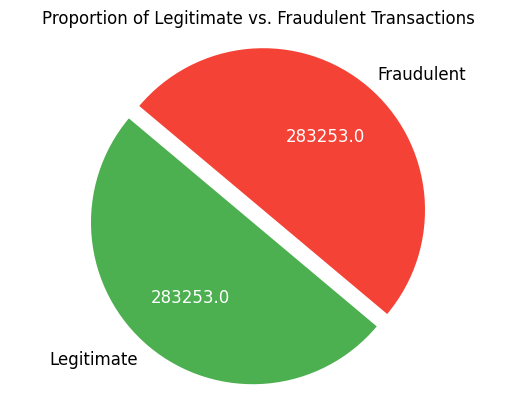

In [50]:
labels = ['Legitimate', 'Fraudulent']
sizes = overSampledData2[['Class']].value_counts()
colors = ['#4CAF50', '#F44336']
explode = (0, 0.1)

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(
    sizes, 
    explode=explode, 
    labels=labels, 
    colors=colors, 
    autopct=lambda pct: (pct / 100. * sum(sizes)), 
    startangle=140
)

for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)
    autotext.set_color('white')

ax.axis('equal')

plt.title('Proportion of Legitimate vs. Fraudulent Transactions')
plt.show()

### Key Points
- <b>underSampledData</b>    : <i> Undersampling for the dataset 'creditCardData'. </i>
- <b>underSampledData2</b>   : <i> Undersampling for the dataset 'creditCardData2'. </i>
- <b> overSampledData </b>   : <i> Oversampling for the dataset 'creditCardData'. </i>
-  <b> overSampledData2 </b> : <i> Oversampling for the dataset 'creditCardData2'. </i>

### Observation
<i> In this dataset, we have 473 records of fraudulent transactions out of a total of 284,807, highlighting a significant class imbalance. Given this distribution, undersampling the majority class may lead to loss of valuable information, making it inefficient. Instead, we will explore techniques such as oversampling to enhance our model's ability to identify fraudulent activities effectively.</i>

# Train-Test Split

### -> train-test split for UnderSampled creditCardData

In [51]:
independentVar = underSampledData.drop(columns = 'Class', axis = 1)
targetVar = underSampledData['Class']

In [52]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(independentVar, targetVar, test_size = 0.2, stratify = targetVar, random_state = 18)

In [53]:
print(f"The Shape of X_train1 is : {X_train1.shape}")
print(f"The Shape of Y_train1 is : {Y_train1.shape}")

print(f"The Shape of X_test1 is : {X_test1.shape}")
print(f"The Shape of Y_test1 is : {Y_test1.shape}")

The Shape of X_train1 is : (756, 30)
The Shape of Y_train1 is : (756,)
The Shape of X_test1 is : (190, 30)
The Shape of Y_test1 is : (190,)


### -> train-test split for OverSampled creditCardData

In [54]:
independentVar = overSampledData.drop(columns = 'Class', axis = 1)
targetVar = overSampledData['Class']

In [55]:
X_train11, X_test11, Y_train11, Y_test11 = train_test_split(independentVar, targetVar, test_size = 0.2, stratify = targetVar, random_state = 18)

In [56]:
print(f"The Shape of X_train11 is : {X_train11.shape}")
print(f"The Shape of Y_train11 is : {Y_train11.shape}")

print(f"The Shape of X_test11 is : {X_test11.shape}")
print(f"The Shape of Y_test11 is : {Y_test11.shape}")

The Shape of X_train11 is : (453204, 30)
The Shape of Y_train11 is : (453204,)
The Shape of X_test11 is : (113302, 30)
The Shape of Y_test11 is : (113302,)


### -> train-test split for UnderSampled creditCardData2

In [57]:
independentVar = underSampledData2.drop(columns = 'Class', axis=1)
targetVar = underSampledData2['Class']

In [58]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(independentVar, targetVar, test_size = 0.2, stratify = targetVar, random_state = 18)

In [59]:
print(f"The Shape of X_train2 is : {X_train2.shape}")
print(f"The Shape of Y_train2 is : {Y_train2.shape}")

print(f"The Shape of X_test2 is : {X_test2.shape}")
print(f"The Shape of Y_test2 is : {Y_test2.shape}")

The Shape of X_train2 is : (756, 30)
The Shape of Y_train2 is : (756,)
The Shape of X_test2 is : (190, 30)
The Shape of Y_test2 is : (190,)


### -> train-test split for OverSampled creditCardData2

In [60]:
independentVar = overSampledData2.drop(columns = 'Class', axis = 1)
targetVar = overSampledData2['Class']

In [61]:
X_train22, X_test22, Y_train22, Y_test22 = train_test_split(independentVar, targetVar, test_size = 0.2, stratify = targetVar, random_state = 18)

In [62]:
print(f"The Shape of X_train22 is : {X_train22.shape}")
print(f"The Shape of Y_train22 is : {Y_train22.shape}")

print(f"The Shape of X_test22 is : {X_test22.shape}")
print(f"The Shape of Y_test22 is : {Y_test22.shape}")

The Shape of X_train22 is : (453204, 30)
The Shape of Y_train22 is : (453204,)
The Shape of X_test22 is : (113302, 30)
The Shape of Y_test22 is : (113302,)


### Key Points
- Train-test split for undersampled creditCardData : X_train1, Y_train1, X_test1, Y_test1
- Train-test split for oversampled creditCardData  : X_train11, Y_train11, X_test11, Y_test11
- Train-test split for undersampled creditCardData2 : X_train2, Y_train2, X_test2, Y_test2
- Train-test split for oversampled creditCardData2 : X_train22, Y_train22, X_test22, Y_test22

# Standarization

In [63]:
scaler1 = StandardScaler()
scaler11 = StandardScaler()
scaler2 = StandardScaler()
scaler22 = StandardScaler()

### -> Standarizing X_train1 and X_test1

In [64]:
X_train1.iloc[:,1:30] = scaler1.fit_transform(X_train1.iloc[:,1:30])

In [65]:
X_test1.iloc[:,1:30] = scaler1.transform(X_test1.iloc[:,1:30])

In [66]:
X_train1.iloc[:,1:30].head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
405,-0.382353,-0.302465,0.239332,0.667080,-0.432435,1.193374,0.090676,0.054306,-0.701371,-0.230566,...,-0.836868,0.228553,1.536234,0.921303,-0.445975,-0.017667,0.417077,0.958808,-1.730744,1.243866
764,-0.526996,0.329952,-0.215137,1.031141,-0.049936,-0.512659,-0.333019,0.023062,-0.135019,-0.479069,...,-0.343158,0.225364,-0.142443,0.320112,-0.342612,0.467826,-0.009863,-1.867192,1.405334,-0.419905
154,-3.097228,3.287484,-2.765899,2.845420,-3.177011,0.182846,-4.017557,-1.690156,-3.355691,-3.253153,...,2.323630,-3.250045,1.057691,1.579570,0.689073,-1.075468,-0.566482,-3.598541,-1.252614,-0.413942


In [67]:
meanValues = scaler1.mean_
stdDevValues = scaler1.scale_

In [68]:
print(f"Mean Values : {meanValues}")
print(f"Standard Deviation : {stdDevValues}")

Mean Values : [-2.06777263e+00  1.59181732e+00 -3.24682328e+00  2.21491367e+00
 -1.36516360e+00 -7.10968125e-01 -2.37924174e+00  4.75112578e-01
 -1.19948027e+00 -2.58121882e+00  1.83850663e+00 -3.00040860e+00
 -4.44089907e-02 -3.38611232e+00 -5.44534425e-02 -1.93902815e+00
 -3.14673619e+00 -1.00854202e+00  3.31471272e-01  1.86850509e-01
  2.14436365e-01  4.52075337e-02 -6.86471008e-02 -5.31572107e-02
  1.74108272e-02  3.69639982e-02  1.23830609e-01  3.37519554e-02
  1.14788029e+02]
Standard Deviation : [  4.9886987    3.34003205   5.7094324    3.15453597   3.83679991
   1.63549756   5.17980309   3.41774749   2.21442021   4.20342796
   2.76216976   4.5132335    1.04003217   4.57870711   0.93529844
   3.38394084   5.78753824   2.34680081   1.24255961   1.00776011
   1.59502859   0.8801413    1.20912328   0.56245876   0.68578435
   0.47586222   0.87419411   0.40867359 273.3669831 ]


### -> Standarizing X_train11 and X_test11

In [69]:
X_train11.iloc[:,1:30] = scaler11.fit_transform(X_train11.iloc[:,1:30])

In [70]:
X_test11.iloc[:,1:30] = scaler11.transform(X_test11.iloc[:,1:30])

In [71]:
X_train11.iloc[:,1:30].head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
3349,0.827440,-0.466417,0.317069,-0.625376,0.489735,0.062466,0.531098,-0.177630,0.644457,0.606766,...,-0.318510,-0.298107,-0.862281,0.414762,1.379717,-0.507156,0.253325,-0.203602,-0.199894,-0.438529
526905,0.622713,-0.727610,0.778474,-0.617638,0.054815,0.413821,0.391539,-0.099799,1.145792,0.533803,...,-0.139511,-0.204157,-0.383299,0.113046,0.979334,-0.079068,2.069142,-0.174471,-0.031343,0.052196
422722,0.192753,0.158472,0.480843,0.509297,0.219470,0.170743,0.187078,-0.221561,-0.204103,-0.034125,...,0.187889,0.445688,-0.338257,-0.144272,0.200688,-0.161725,0.303470,0.537924,0.411024,-0.332862


In [72]:
meanValues = scaler11.mean_
stdDevValues = scaler11.scale_

In [73]:
print(f"Mean Values : {meanValues}")
print(f"Standard Deviation : {stdDevValues}")

Mean Values : [-2.29783076e+00  1.77182325e+00 -3.45887293e+00  2.28438037e+00
 -1.50913409e+00 -7.46249427e-01 -2.67725172e+00  5.38322441e-01
 -1.29653233e+00 -2.77508391e+00  1.88775198e+00 -3.10585953e+00
 -3.96261840e-02 -3.49218276e+00 -4.12647569e-02 -2.02724304e+00
 -3.28630781e+00 -1.09380806e+00  3.39534547e-01  2.06748338e-01
  2.34128184e-01  3.99584558e-02 -4.00306294e-02 -5.44449951e-02
  2.57596941e-02  2.81795082e-02  1.09187314e-01  4.38696377e-02
  9.67143687e+01]
Standard Deviation : [  5.21971327   3.43101795   5.90457721   3.11321354   4.00408349
   1.61235753   5.30051274   3.8475181    2.17420506   4.19144414
   2.66504442   4.41028769   0.99477448   4.47248135   0.91744875
   3.29683351   5.69154246   2.28878793   1.16691949   0.97326806
   1.76575485   0.89755468   0.92113585   0.5402131    0.61624236
   0.44173138   0.83615986   0.40567959 218.51334426]


### -> Standarizing X_train2 and X_test2

In [74]:
X_train2.iloc[:,1:30] = scaler2.fit_transform(X_train2.iloc[:,1:30])

In [75]:
X_test2.iloc[:,1:30] = scaler2.transform(X_test2.iloc[:,1:30])

In [76]:
X_train2.iloc[:,1:30].head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
405,-1.283987,-0.208038,-0.218301,1.078436,-1.477078,1.362043,-0.929319,0.662455,-1.295793,-1.021585,...,-1.747835,0.850939,1.764378,1.819146,-0.542498,-0.050812,0.460202,1.175219,-1.754744,1.330826
764,-1.379111,1.120757,-1.164957,1.078436,-0.725141,-0.688876,-1.178576,0.503689,-0.540199,-1.021585,...,-0.550514,0.840703,-0.138567,0.972185,-0.446683,0.517935,0.007535,-1.760796,1.322352,-1.653742
154,-1.379111,1.251177,-1.164957,1.078436,-1.477078,0.350161,-1.178576,-1.822503,-1.295793,-1.021585,...,1.396791,-2.024974,1.221902,1.819146,0.654553,-1.290009,-0.582625,-1.760796,-1.754744,-1.101684


In [77]:
meanValues = scaler2.mean_
stdDevValues = scaler2.scale_

In [78]:
print(f"Mean Values : {meanValues}")
print(f"Standard Deviation : {stdDevValues}")

Mean Values : [-0.56597629  0.91227756 -1.44585517  1.27393923 -0.50932049 -0.72128968
 -0.68879878  0.21516046 -0.77921156 -0.81418766  1.13316363 -0.85397804
 -0.04160868 -0.7871257  -0.04774074 -0.63889451 -0.57458917 -0.41979911
  0.25415636  0.06979251  0.156154    0.02742268 -0.01850761 -0.10565763
  0.03504011  0.02888864  0.07484398  0.04957156  2.89669028]
Standard Deviation : [1.19962155 1.58963142 1.9904508  1.71579999 1.44446016 1.46999248
 1.31360668 0.67258434 1.33146652 1.17972192 1.57425923 1.21115755
 1.03004793 1.08918579 0.91561647 1.21788596 1.13794366 1.1559837
 1.01749761 0.4155448  0.49689844 0.7764142  0.3465548  0.92764523
 0.58539794 0.44881698 0.2205016  0.17041279 1.75159716]


### -> Standarizing X_train22 and X_test22

In [79]:
X_train22.iloc[:,1:30] = scaler22.fit_transform(X_train22.iloc[:,1:30])

In [80]:
X_test22.iloc[:,1:30] = scaler22.transform(X_test22.iloc[:,1:30])

In [81]:
X_train22.iloc[:,1:30].head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
3349,1.732287,-0.523941,-0.078629,-0.551444,0.697269,0.180384,0.715730,-0.630563,0.714043,0.551966,...,-0.475997,-1.028158,-1.028850,1.167699,1.534056,-0.593400,0.280454,-0.689885,-0.551462,-1.386787
526905,0.941155,-1.123111,1.309156,-0.537323,-0.561546,0.641477,0.101624,-0.136439,1.566448,0.278893,...,-0.015942,-0.659858,-0.445337,0.274195,1.007096,-0.103607,2.169953,-0.571187,-0.118098,1.138116
422722,-1.449620,1.301094,-1.188046,1.082250,-1.539746,-1.808061,-1.255778,1.469333,-1.326372,-1.044144,...,-2.127097,1.414405,0.521388,-1.535807,1.560913,0.600909,0.534290,-1.919608,-1.896566,-0.997807


In [82]:
meanValues = scaler22.mean_
stdDevValues = scaler22.scale_

In [83]:
print(f"Mean Values : {meanValues}")
print(f"Standard Deviation : {stdDevValues}")

Mean Values : [-0.58265802  0.95518216 -1.43235585  1.27814291 -0.51280209 -0.74315627
 -0.72430864  0.23703122 -0.80842909 -0.85001628  1.15250993 -0.86656162
 -0.03723308 -0.78474337 -0.03341967 -0.66187452 -0.56500722 -0.45625983
  0.24585963  0.07700343  0.1708549   0.02403492 -0.02118777 -0.1051265
  0.03283784  0.02102709  0.08051834  0.04978866  2.8642385 ]
Standard Deviation : [1.12976511 1.49566843 1.96313005 1.70586908 1.3834091  1.41095342
 1.20457235 0.60603717 1.27874255 1.11991923 1.51880205 1.19163789
 0.9856035  1.04877133 0.88829122 1.11006153 1.04046952 1.07648731
 0.9282668  0.37867913 0.45042721 0.73676495 0.31104677 0.88565137
 0.53860655 0.42450576 0.2052152  0.15778408 1.60634771]


# Model Training

### Implemented Algorithm Overview
- Logistic Regression
- Support Vector Machine (SVM)
- Decision Tree Classifier
- Random Forest Classifier
- KNN

In [84]:
models = {}

## -> Logistic Regression Models

In [85]:
modelLR = LogisticRegression(max_iter = 200, random_state = 42)
print(modelLR)

LogisticRegression(max_iter=200, random_state=42)


In [86]:
param_grid = [
    {
        'solver': ['liblinear'],
        'penalty': ['l1', 'l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['lbfgs', 'newton-cg'],
        'penalty': ['l2'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100]
    },
    {
        'solver': ['saga'],
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'l1_ratio': [0, 0.5, 1]
    }
]

#Grid Search
grid_search = GridSearchCV(estimator = modelLR, param_grid = param_grid, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 1, error_score = 'raise')

#Random Search
random_search = RandomizedSearchCV(estimator = modelLR, param_distributions = param_grid, n_iter = 25, scoring = 'accuracy', cv = 5, n_jobs = -1, verbose = 1, random_state = 42, error_score = 'raise')

### Logistic Regression model training with X_train1, Y_train1

In [87]:
print("------------Grid Search for UnderSampled creditCardData------------")
grid_search.fit(X_train1, Y_train1)
print("Best Parameters:\n", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

------------Grid Search for UnderSampled creditCardData------------
Fitting 5 folds for each of 78 candidates, totalling 390 fits
Best Parameters:
 {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
Best Score: 0.9378180550714535


In [88]:
modelLR = LogisticRegression(penalty = 'l2', C = 10, solver = 'newton-cg', max_iter = 200, random_state = 42)

In [89]:
t0 = time.time()
modelLR.fit(X_train1, Y_train1)
timeTaken = time.time() - t0
predict = modelLR.predict(X_test1)
probability = modelLR.predict_proba(X_test1)
modelLR.coef_

array([[-8.30301430e-06,  4.77706400e-01, -1.55018927e-01,
         1.14574046e-01,  2.84038141e+00,  1.54984248e+00,
        -6.08248331e-01, -2.68845570e-01, -1.56143044e+00,
        -3.38714582e-01, -2.30878170e+00,  5.42810974e-01,
        -2.58214625e+00, -2.90151255e-01, -4.00417818e+00,
        -3.17369361e-01, -1.55733191e+00, -1.13197800e+00,
        -4.19452889e-01,  4.35573487e-02, -3.31925023e-01,
         9.50075403e-01,  2.94688926e-01,  1.96811338e-01,
        -2.61594051e-01,  1.48842846e-01, -3.32775089e-01,
         9.73209255e-02,  2.28111295e-01,  6.82286963e-01]])

In [90]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9985,0.0015,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9985,TN
2,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
3,0.8813,0.1187,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.8813,FN
4,0.9986,0.0014,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9986,TN
5,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
6,0.6362,0.3638,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.6362,TN
7,0.9737,0.0263,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9737,TN
8,0.9925,0.0075,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9925,TN
9,0.9929,0.0071,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9929,TN
10,0.0007,0.9993,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9993,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [91]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[92  3]
 [ 8 87]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        95
           1       0.97      0.92      0.94        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



In [92]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9405405405405406
Jaccard Index : 0.8877551020408163
Jaccard Distance: 0.11224489795918369
log loss : 0.17653114463676609


In [93]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9421052631578948
Training Time: 1.038628101348877 in (seconds)


#### K-Fold Cross-Validation

In [94]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle=True, random_state=42)
scores = cross_val_score(modelLR, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.93157895 0.92063492 0.95238095 0.91534392 0.96296296]
Mean accuracy : 0.9365803397382344


In [95]:
models['LR Model 1'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [96]:
with open('Models/modelLR1.pkl', 'wb') as file:
    pickle.dump(modelLR, file)

### Logistic Regression model training with X_train11, Y_train11

In [97]:
print("------------Random Search for OverSampled creditCardData------------")
random_search.fit(X_train11, Y_train11)
print("Best Parameters:\n", random_search.best_params_)
print("Best Score:", random_search.best_score_)

------------Random Search for OverSampled creditCardData------------
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best Parameters:
 {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Best Score: 0.97821069518476


In [98]:
modelLR = LogisticRegression(penalty = 'l1', C = 100, solver = 'liblinear', max_iter = 200, random_state = 42)

In [99]:
t0 = time.time()
modelLR.fit(X_train11, Y_train11)
timeTaken = time.time() - t0
predict = modelLR.predict(X_test11)
probability = modelLR.predict_proba(X_test11)
modelLR.coef_

array([[-8.59707976e-06,  4.09853405e+00,  5.41849643e-01,
         1.75517559e+00,  2.79722773e+00,  2.36265765e+00,
        -7.47453206e-01, -2.46529813e+00, -2.33955148e+00,
        -1.34133694e+00, -4.36616808e+00,  1.71411943e+00,
        -6.16471706e+00, -4.24944438e-01, -7.83525452e+00,
        -1.92441463e-01, -3.19965922e+00, -7.09837019e+00,
        -7.46938660e-01,  4.17320289e-01, -6.94946715e-01,
         1.89348823e-01,  5.93017940e-01,  3.12570441e-01,
         7.44147438e-02, -6.44171645e-02, -1.58440360e-01,
         1.70752988e-01,  3.55156959e-01,  1.26212373e+00]])

In [100]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test11.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test11.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9776,0.0224,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9776,TN
2,0.9495,0.0505,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9495,TN
3,0.4181,0.5819,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.5819,TP
4,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
5,0.9419,0.0581,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9419,TN
6,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
7,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
8,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
9,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [101]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test11, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test11, predict))

__________________________________________________________
Confusion Matrix
[[56149   502]
 [ 1937 54714]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56651
           1       0.99      0.97      0.98     56651

    accuracy                           0.98    113302
   macro avg       0.98      0.98      0.98    113302
weighted avg       0.98      0.98      0.98    113302



In [102]:
F1Score = f1_score(Y_test11, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test11, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test11, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9781973236074982
Jaccard Index : 0.9573250747992231
Jaccard Distance: 0.04267492520077687
log loss : 0.06549426563539854


In [103]:
accuracyScore = accuracy_score(Y_test11, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.978473460309615
Training Time: 111.77003908157349 in (seconds)


#### K-Fold Cross-Validation

In [104]:
X = pd.concat([X_train11, X_test11], axis = 0)
Y = pd.concat([Y_train11, Y_test11], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelLR, X, Y, cv = KFoldCV, scoring = 'accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}") 

Cross-Validation Scores : [0.9791001  0.97793488 0.97816436 0.97842031 0.97825262]
Mean accuracy : 0.9783744554768198


In [105]:
models['LR Model 2'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [106]:
with open('Models/modelLR2.pkl', 'wb') as file:
    pickle.dump(modelLR, file)

### Logistic Regression model training with X_train2, Y_train2

In [107]:
print("------------Grid Search for underSampled creditCardData2------------")
grid_search.fit(X_train2, Y_train2)
print("Best Parameters:\n", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

------------Grid Search for underSampled creditCardData2------------
Fitting 5 folds for each of 78 candidates, totalling 390 fits
Best Parameters:
 {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Score: 0.9391512722202858


In [108]:
modelLR = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'lbfgs', max_iter = 200, random_state = 42)

In [109]:
t0 = time.time()
modelLR.fit(X_train2, Y_train2)
timeTaken = time.time() - t0
predict = modelLR.predict(X_test2)
probability = modelLR.predict_proba(X_test2)
modelLR.coef_

array([[-6.32283441e-07, -4.01140481e-01, -2.61008859e-01,
        -3.71438940e-01,  1.25665094e+00,  4.09463595e-02,
        -8.96568324e-02, -1.76215589e-01, -5.07732824e-01,
        -1.68941549e-01, -5.10790337e-01,  3.92107964e-01,
        -6.00697280e-01, -9.27578720e-02, -8.46691961e-01,
        -1.43313368e-01, -2.67614071e-01,  6.92491382e-02,
        -1.19399533e-01, -5.73887776e-02, -1.86976252e-01,
         2.40393167e-01,  3.06663643e-02,  3.47033388e-02,
        -1.27946024e-01,  3.31163882e-02, -2.84461928e-01,
         1.04588928e-01,  1.63236553e-01, -9.97382033e-02]])

In [110]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test2.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test2.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9780,0.0220,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9780,TN
2,0.0069,0.9931,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9931,TP
3,0.9218,0.0782,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.9218,FN
4,0.9908,0.0092,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9908,TN
5,0.0067,0.9933,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9933,TP
6,0.7842,0.2158,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.7842,TN
7,0.9419,0.0581,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9419,TN
8,0.9826,0.0174,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9826,TN
9,0.9764,0.0236,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9764,TN
10,0.1467,0.8533,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.8533,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [111]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test2,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test2, predict))

__________________________________________________________
Confusion Matrix
[[94  1]
 [ 7 88]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        95
           1       0.99      0.93      0.96        95

    accuracy                           0.96       190
   macro avg       0.96      0.96      0.96       190
weighted avg       0.96      0.96      0.96       190



In [112]:
F1Score = f1_score(Y_test2, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test2, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test2, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9565217391304348
Jaccard Index : 0.9166666666666666
Jaccard Distance: 0.08333333333333337
log loss : 0.15289562829597197


In [113]:
accuracyScore = accuracy_score(Y_test2, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9578947368421052
Training Time: 0.2369680404663086 in (seconds)


#### K-Fold Cross-Validation

In [114]:
X = pd.concat([X_train2, X_test2], axis = 0)
Y = pd.concat([Y_train2, Y_test2], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle=True, random_state=42)
scores = cross_val_score(modelLR, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.94210526 0.92063492 0.95238095 0.93121693 0.96825397]
Mean accuracy : 0.9429184071289335


In [115]:
models['LR Model 3'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [116]:
with open('Models/modelLR3.pkl', 'wb') as file:
    pickle.dump(modelLR, file)

### Logistic Regression model training with X_train22, Y_train22

In [ ]:
print("------------Random Search for OverSampled creditCardData2------------")
random_search.fit(X_train22, Y_train22)
print("Best Parameters:\n", random_search.best_params_)
print("Best Score:", random_search.best_score_)

------------Random Search for OverSampled creditCardData2------------
Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [118]:
modelLR = LogisticRegression(penalty = 'l2', C = 0.1, solver = 'lbfgs', max_iter=200, random_state=42)

In [119]:
t0 = time.time()
modelLR.fit(X_train22, Y_train22)
timeTaken = time.time() - t0
predict = modelLR.predict(X_test22)
probability = modelLR.predict_proba(X_test22)
modelLR.coef_

array([[ 1.01529433e-05, -3.62162956e-01, -4.55505016e-01,
        -2.61319100e-01,  2.37056416e+00, -4.30364951e-01,
        -3.65288730e-02, -5.87826025e-01, -9.95222542e-01,
        -3.20404281e-01, -9.45418901e-01,  1.12185554e+00,
        -1.37579285e+00, -1.81558574e-01, -1.42233904e+00,
        -1.73046491e-01, -7.69428626e-01, -3.44405149e-01,
        -2.26705367e-01,  2.34364094e-02, -1.86581831e-01,
         1.13364814e-01,  3.07140763e-01,  1.06425196e-01,
        -1.32451919e-02,  2.38405792e-01, -3.69056128e-01,
         7.31583587e-02,  4.13872132e-01, -4.25464629e-01]])

In [120]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test22.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test22.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9897,0.0103,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9897,TN
2,0.9030,0.0970,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9030,TN
3,0.0001,0.9999,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9999,TP
4,0.0171,0.9829,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9829,TP
5,0.8076,0.1924,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.8076,TN
6,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
7,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
8,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
9,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [121]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test22, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test22, predict))

__________________________________________________________
Confusion Matrix
[[55599  1052]
 [ 2610 54041]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56651
           1       0.98      0.95      0.97     56651

    accuracy                           0.97    113302
   macro avg       0.97      0.97      0.97    113302
weighted avg       0.97      0.97      0.97    113302



In [122]:
F1Score = f1_score(Y_test22, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test22, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test22, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9672286655211912
Jaccard Index : 0.9365370951250368
Jaccard Distance: 0.0634629048749632
log loss : 0.08630221260538741


In [123]:
accuracyScore = accuracy_score(Y_test22, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9676792995710579
Training Time: 34.46827244758606 in (seconds)


#### K-Fold Cross-Validation

In [124]:
X = pd.concat([X_train22, X_test22], axis = 0)
Y = pd.concat([Y_train22, Y_test22], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle=True, random_state=42)
scores = cross_val_score(modelLR, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.9692415  0.96825271 0.96918827 0.96919709 0.96920592]
Mean accuracy : 0.9690170973927923


In [125]:
models['LR Model 4'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [126]:
with open('Models/modelLR4.pkl', 'wb') as file:
    pickle.dump(modelLR, file)

### Comparison of logistic regression models

##### Logistic Regression Models
- LR Model 1 => A logistic regression model trained on undersampled creditCardData
- LR Model 2 => A logistic regression model trained on oversampled creditCardData
- LR Model 3 => A logistic regression model trained on undersampled creditCardData2
- LR Model 4 => A logistic regression model trained on oversampled creditCardData2

In [127]:
compareDf = pd.DataFrame(models, index = ['F1 Score', 'Jaccard Index', 'Jaccard Distance', 'Log Loss', 'Accuracy Score', 'Time Taken', 'K-Fold CV'])
compareDf

,LR Model 1,LR Model 2,LR Model 3,LR Model 4
F1 Score,0.940541,0.979777,0.956522,0.967229
Jaccard Index,0.887755,0.960355,0.916667,0.936537
Jaccard Distance,0.112245,0.039645,0.083333,0.063463
Log Loss,0.176531,0.062086,0.152896,0.086302
Accuracy Score,0.942105,0.980009,0.957895,0.967679
Time Taken,1.028209,109.469538,0.160191,34.468272
K-Fold CV,0.936580,0.978350,0.942918,0.969017


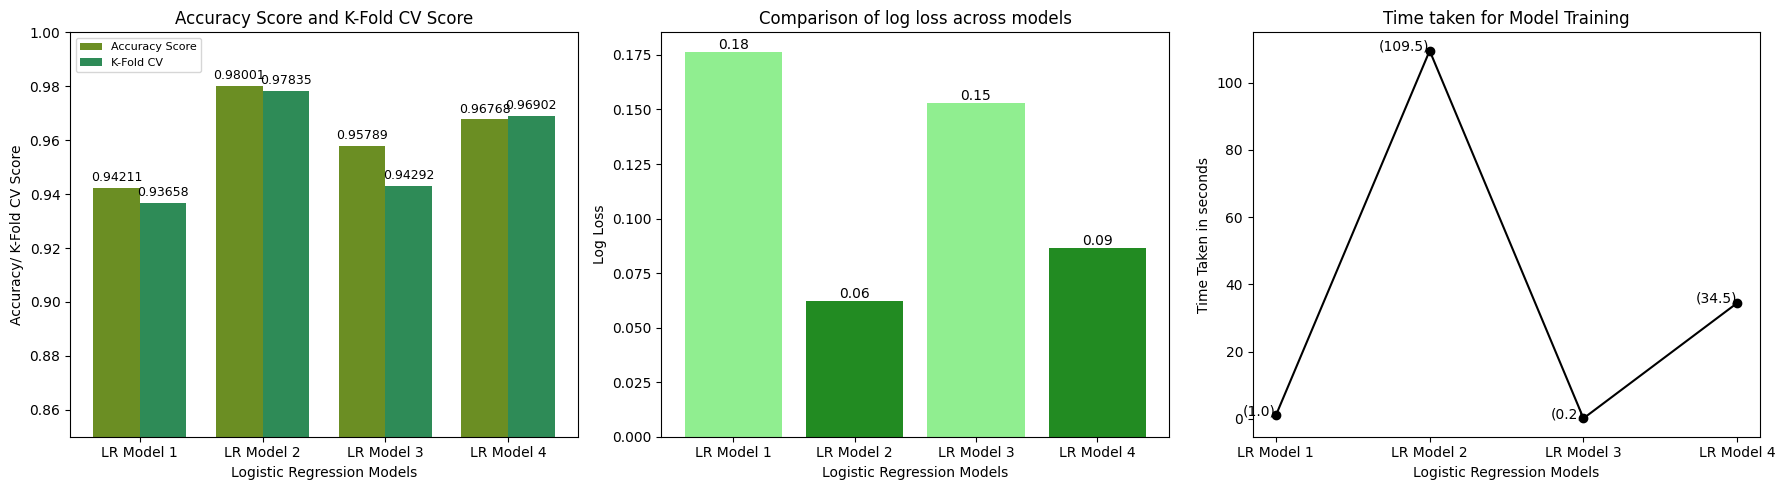

In [129]:
x = np.linspace(0, 5, 5)
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

barwidth = 0.38
modelLists = compareDf.columns
x = [i for i in range(len(modelLists))]

axs[0].bar([p - barwidth/2 for p in x], compareDf.loc['Accuracy Score',], width=barwidth, label='Accuracy Score', color="#6B8E23")
for i, value in enumerate(compareDf.loc['Accuracy Score',]):
    axs[0].annotate(f'{value:.5f}', (x[i] - barwidth/2, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

axs[0].bar([p + barwidth/2 for p in x], compareDf.loc['K-Fold CV',], width=barwidth, label='K-Fold CV', color="#2E8B57")
for i, value in enumerate(compareDf.loc['K-Fold CV',]):
    axs[0].annotate(f'{value:.5f}', (x[i] + barwidth/2, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

axs[0].set_ylim(0.85,1)

axs[0].legend(loc = "upper left", prop={'size': 8})
axs[0].set_xlabel("Logistic Regression Models")
axs[0].set_ylabel("Accuracy/ K-Fold CV Score")

axs[0].set_title('Accuracy Score and K-Fold CV Score')

axs[0].set_xticks(x)
axs[0].set_xticklabels(modelLists)

###########################################################################################################################################

bars = axs[1].bar(compareDf.columns, compareDf.loc['Log Loss'], width = 0.8, align = 'center', color = ['#90EE90','#228B22','#90EE90','#228B22'])

for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha = 'center', va = 'bottom', fontsize=10)

axs[1].set_title('Comparison of log loss across models')
axs[1].set_xlabel("Logistic Regression Models")
axs[1].set_ylabel("Log Loss")

###########################################################################################################################################

axs[2].plot(compareDf.columns, compareDf.loc['Time Taken'], marker = 'o', color = "black")

for i, (xi, yi) in enumerate(zip(compareDf.columns, compareDf.loc['Time Taken'])):
    axs[2].text(xi, yi, f'({yi:.1f})', fontsize = 10, ha = 'right')
    
axs[2].set_title('Time taken for Model Training')
axs[2].set_xlabel("Logistic Regression Models")
axs[2].set_ylabel("Time Taken in seconds")

###########################################################################################################################################

plt.tight_layout()
plt.show()

### Observation
- <i> The treatment of outliers and skewness can drastically influence credit card fraud detection outcomes. Our analysis indicates that models trained on data with outliers (LR Models 1 and 2) exhibited distinct performance metrics compared to those trained on pre-processed data (LR Models 3 and 4). The removal of outliers in LR Models 2 and 4 generally enhanced the accuracy and other performance metrics, suggesting that the models are more robust in a cleaner dataset. However, this exclusion may also overlook key indicators that differentiate fraudulent activities from legitimate ones. Interestingly, when models retained the outliers (LR Models 1 and 3), they showcased superior performance in specific metrics, emphasizing the potential value of these extreme data points. Conversely, the combination of outlier removal and oversampling in LR Models 2 and 4 resulted in diminished accuracy, highlighting the critical role outliers can play in the context of fraud detection. Thus, maintaining outliers in the dataset may significantly bolster a model's capacity to effectively identify fraudulent transactions. </i>


- <i>  LR Model 1    ->    LR Model 3 ↑↑↑ </i>
- <i>  LR Model 2    ->    LR Model 4 ↓↓↓ </i>

                                        LR Model 2 > LR Model 4 > LR Model 3 > LR Model 1

## -> Support Vector Machine (SVM)

In [130]:
modelSVM = svm.SVC()

In [131]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}
# Using random search for SVM tuning because it's faster and requires fewer resources than grid search.
random_search = RandomizedSearchCV(modelSVM, param_distributions = param_grid, n_iter = 50, cv = 5, n_jobs = -1, random_state = 42)

### SVM model training with X_train1, Y_train1

In [139]:
print("------------Random Search for UnderSampled creditCardData------------")
random_search.fit(X_train1, Y_train1)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

------------Random Search for UnderSampled creditCardData------------


KeyboardInterrupt: 

In [132]:
modelSVM = svm.SVC(kernel = 'linear', C = 0.01, gamma = 'scale')
print(modelSVM)

SVC(C=0.01, kernel='linear')


In [133]:
t0 = time.time()
modelSVM.fit(X_train1, Y_train1)
timeTaken = time.time() - t0
predict = modelSVM.predict(X_test1)
predict[:18]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [134]:
dictProb = {'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, val in enumerate(predict):
    Sample.append(i+1)
    predClass  = 'Class 0 (legitimate)' if val == 0 else 'Class 1 (fraudulent)' if val == 1 else 'Class 1 (fraudulent)'
    actClass = 'Class 0 (legitimate)' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent)' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Actual Class,Predicted Class,Status
1,Class 0 (legitimate),Class 0 (legitimate),TN
2,Class 1 (fraudulent),Class 0 (legitimate),FN
3,Class 1 (fraudulent),Class 0 (legitimate),FN
4,Class 0 (legitimate),Class 0 (legitimate),TN
5,Class 1 (fraudulent),Class 0 (legitimate),FN
6,Class 0 (legitimate),Class 0 (legitimate),TN
7,Class 0 (legitimate),Class 0 (legitimate),TN
8,Class 0 (legitimate),Class 0 (legitimate),TN
9,Class 0 (legitimate),Class 0 (legitimate),TN
10,Class 1 (fraudulent),Class 0 (legitimate),FN


### Model Evaluation

#### Model Performance on Holdout Set

In [135]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[94  1]
 [42 53]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.69      0.99      0.81        95
           1       0.98      0.56      0.71        95

    accuracy                           0.77       190
   macro avg       0.84      0.77      0.76       190
weighted avg       0.84      0.77      0.76       190



In [136]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

F1 Score : 0.7114093959731543
Jaccard Index : 0.5520833333333334
Jaccard Distance: 0.44791666666666663


In [137]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.7736842105263158
Training Time: 52.47216987609863 in (seconds)


#### K-Fold Cross-Validation

In [138]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle=True, random_state=42)
scores = cross_val_score(modelSVM, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.82105263 0.71957672 0.78835979 0.71428571 0.77248677]
Mean accuracy : 0.7631523252575885


In [149]:
models['SVM Model 1'] = [F1Score, jaccard_index, jaccard_distance, np.nan, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [150]:
with open('Models/modelSVM1.pkl', 'wb') as file:
    pickle.dump(modelSVM, file)

### SVM model training with X_train2, Y_train2

In [ ]:
print("------------Random Search for UnderSampled creditCardData------------")
random_search.fit(X_train2, Y_train2)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

In [151]:
modelSVM = svm.SVC(kernel = 'linear', C = 0.01, gamma = 'scale')
print(modelSVM)

SVC(C=0.01, kernel='linear')


In [ ]:
t0 = time.time()
modelSVM.fit(X_train2, Y_train2)
timeTaken = time.time() - t0
predict = modelSVM.predict(X_test2)
predict[:18]

In [ ]:
dictProb = {'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, val in enumerate(predict):
    Sample.append(i+1)
    predClass  = 'Class 0 (legitimate)' if val == 0 else 'Class 1 (fraudulent)' if val == 1 else 'Class 1 (fraudulent)'
    actClass = 'Class 0 (legitimate)' if Y_test2.iloc[i] == 0 else 'Class 1 (fraudulent)' if Y_test2.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

### Model Evaluation

#### Model Performance on Holdout Set

In [ ]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test2, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test2, predict))

In [ ]:
F1Score = f1_score(Y_test2, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test2, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

In [ ]:
accuracyScore = accuracy_score(Y_test2, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

#### K-Fold Cross-Validation

In [ ]:
X = pd.concat([X_train2, X_test2], axis = 0)
Y = pd.concat([Y_train2, Y_test2], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelSVM, X, Y, cv = KFoldCV, scoring = 'accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

In [ ]:
models['SVM Model 2'] = [F1Score, jaccard_index, jaccard_distance, np.nan, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [ ]:
with open('Models/modelSVM2.pkl', 'wb') as file:
    pickle.dump(modelSVM, file)

### Observation
- <i> Training a Support Vector Machine (SVM) for credit card fraud detection, even with fewer than a thousand records, is time-consuming due to the algorithm's computational complexity. SVMs, especially with non-linear kernels, require significant processing power and memory to compute the kernel matrix and optimize the decision boundary. This issue is exacerbated as the dataset grows larger, making SVMs less efficient compared to other models. Despite their potential for high accuracy, the training time and resource requirements of SVMs often make them less practical for large datasets. Alternative algorithms like Random Forests or Logistic Regression may offer better efficiency and scalability while still delivering strong performance. </i>
- <i> Training with both X_train1, Y_train1, and X_train2, Y_train2 would be even more time-consuming and is therefore not suitable. </i>

## -> Decision Tree Classifier

In [169]:
modelTree = DecisionTreeClassifier()

In [183]:
# Hyperparameter to fine tune
param_grid = {
    'max_depth': range(1, 10, 1),
    'min_samples_leaf': range(1, 20, 2),
    'min_samples_split': range(2, 20, 2),
    'criterion': ["entropy", "gini"]
}

# grid search
grid_search = GridSearchCV(estimator = modelTree, param_grid = param_grid, cv = 5, verbose = True)

# random search for model tuning because it's faster and requires fewer resources than grid search.
random_search = RandomizedSearchCV(modelTree, param_distributions = param_grid, n_iter = 50, cv = 5, n_jobs = -1, random_state = 42)

### Decision Tree Classifier model training with X_train1, Y_train1

In [167]:
print("------------Grid Search for UnderSampled creditCardData------------")

grid_search.fit(X_train1, Y_train1)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

------------Grid Search for UnderSampled creditCardData------------
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9206517950505402
DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5)


In [170]:
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 6, min_samples_leaf = 5)

In [171]:
t0 = time.time()
modelTree.fit(X_train1, Y_train1)
timeTaken = time.time() - t0
predict = modelTree.predict(X_test1)
probability = modelTree.predict_proba(X_test1)
predict[:18]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [172]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
2,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
3,1.0000,0.0000,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 1.0000,FN
4,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
5,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
6,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
7,0.9528,0.0472,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9528,TN
8,0.9528,0.0472,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9528,TN
9,0.2000,0.8000,Class 0 (legitimate) 0.0000,Class 1 (fraudulent) 0.8000,FP
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [173]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[89  6]
 [ 9 86]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.94      0.92        95
           1       0.93      0.91      0.92        95

    accuracy                           0.92       190
   macro avg       0.92      0.92      0.92       190
weighted avg       0.92      0.92      0.92       190



In [174]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9197860962566845
Jaccard Index : 0.8514851485148515
Jaccard Distance: 0.14851485148514854
log loss : 1.961136261058238


In [175]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9210526315789473
Training Time: 0.04774069786071777 in (seconds)


#### K-Fold Cross-Validation

In [176]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle=True, random_state=42)
scores = cross_val_score(modelTree, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.87894737 0.9047619  0.8994709  0.8994709  0.93121693]
Mean accuracy : 0.9027736006683375


In [177]:
models['DecisionTree Model 1'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [178]:
with open('Models/modelTree1.pkl', 'wb') as file:
    pickle.dump(modelTree, file)

### Decision Tree Classifier model training with X_train11, Y_train11

In [204]:
print("------------Random Search for OverSampled creditCardData------------")

random_search.fit(X_train11, Y_train11)

print("best accuracy", random_search.best_score_)
print(random_search.best_estimator_)

------------Random Search for OverSampled creditCardData------------


KeyboardInterrupt: 

In [125]:
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, min_samples_leaf = 19)

In [126]:
t0 = time.time()
modelTree.fit(X_train11, Y_train11)
timeTaken = time.time() - t0
predict = modelTree.predict(X_test11)
probability = modelTree.predict_proba(X_test11)
predict[:18]

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [127]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test11.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test11.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.1165,0.8835,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.8835,TP
2,0.0002,0.9998,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9998,TP
3,0.9593,0.0407,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9593,TN
4,0.9945,0.0055,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9945,TN
5,0.9970,0.0030,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9970,TN
6,0.0002,0.9998,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9998,TP
7,0.9945,0.0055,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9945,TN
8,0.9945,0.0055,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9945,TN
9,0.0002,0.9998,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9998,TP
10,0.0002,0.9998,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9998,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [128]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[55851  1012]
 [ 2300 54563]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56863
           1       0.98      0.96      0.97     56863

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726



In [129]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9705437663423397
Jaccard Index : 0.9427732181425486
Jaccard Distance: 0.05722678185745145
log loss : 0.08209039226200938


In [130]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9708773719290223
Training Time: 38.814669370651245 in (seconds)


#### K-Fold Cross-Validation

In [131]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelTree, X, Y, cv = KFoldCV, scoring = 'accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.96941772 0.97133461 0.96931221 0.96859118 0.96960238]
Mean accuracy : 0.969651618803088


In [132]:
models['DecisionTree Model 2'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [133]:
with open('Models/modelTree2.pkl', 'wb') as file:
    pickle.dump(modelTree, file)

### Decision Tree Classifier model training with X_train2, Y_train2

In [185]:
print("------------Grid Search for UnderSampled creditCardData2------------")

grid_search.fit(X_train2, Y_train2)

print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

------------Grid Search for UnderSampled creditCardData2------------
Fitting 5 folds for each of 1620 candidates, totalling 8100 fits
best accuracy 0.9206517950505402
DecisionTreeClassifier(max_depth=4)


In [194]:
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 5)

In [195]:
t0 = time.time()
modelTree.fit(X_train2, Y_train2)
timeTaken = time.time() - t0
predict = modelTree.predict(X_test2)
probability = modelTree.predict_proba(X_test2)
predict[:18]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [196]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test2.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test2.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9664,0.0336,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9664,TN
2,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
3,0.8155,0.1845,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.8155,FN
4,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
5,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
6,0.6364,0.3636,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.6364,TN
7,0.9664,0.0336,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9664,TN
8,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
9,0.8155,0.1845,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.8155,TN
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [197]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test2, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test2, predict))

__________________________________________________________
Confusion Matrix
[[92  3]
 [ 9 86]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        95
           1       0.97      0.91      0.93        95

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190



In [198]:
F1Score = f1_score(Y_test2, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test2, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test2, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9347826086956522
Jaccard Index : 0.8775510204081632
Jaccard Distance: 0.12244897959183676
log loss : 0.30330577573277


In [199]:
accuracyScore = accuracy_score(Y_test2, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9368421052631579
Training Time: 0.03436279296875 in (seconds)


#### K-Fold Cross-Validation

In [200]:
X = pd.concat([X_train2, X_test2], axis = 0)
Y = pd.concat([Y_train2, Y_test2], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelTree, X, Y, cv = KFoldCV, scoring = 'accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.90526316 0.9047619  0.92063492 0.8994709  0.95238095]
Mean accuracy : 0.9165023670286828


In [201]:
models['DecisionTree Model 3'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [202]:
with open('Models/modelTree3.pkl', 'wb') as file:
    pickle.dump(modelTree, file)

### Decision Tree Classifier model training with X_train22, Y_train22

In [ ]:
print("------------Random Search for UnderSampled creditCardData2------------")

random_search.fit(X_train22, Y_train22)

print("best accuracy", random_search.best_score_)
print(random_search.best_estimator_)

In [ ]:
modelTree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, min_samples_leaf = 5)

In [ ]:
t0 = time.time()
modelTree.fit(X_train22, Y_train22)
timeTaken = time.time() - t0
predict = modelTree.predict(X_test22)
probability = modelTree.predict_proba(X_test22)
predict[:18]

In [ ]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test22.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test22.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

### Model Evaluation

#### Model Performance on Holdout Set

In [ ]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test22, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test22, predict))

In [ ]:
F1Score = f1_score(Y_test22, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test22, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test22, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

In [ ]:
accuracyScore = accuracy_score(Y_test22, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

#### K-Fold Cross-Validation

In [ ]:
X = pd.concat([X_train22, X_test22], axis = 0)
Y = pd.concat([Y_train22, Y_test22], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelTree, X, Y, cv = KFoldCV, scoring = 'accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

In [ ]:
models['DecisionTree Model 3'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [ ]:
with open('Models/modelTree4.pkl', 'wb') as file:
    pickle.dump(modelTree, file)

### Comparison of Decision Tree Classifier models

##### DecisionTree Classifier Models
- DecisionTree Model 1 => A Decision Tree Classifier model trained on undersampled creditCardData
- DecisionTree Model 2 => A Decision Tree Classifier model trained on oversampled creditCardData
- DecisionTree Model 3 => A Decision Tree Classifier model trained on undersampled creditCardData2
- DecisionTree Model 4 => A Decision Tree Classifier model trained on oversampled creditCardData2

In [134]:
compareDf = pd.DataFrame({'DecisionTree Model 1': models['DecisionTree Model 1'], 'DecisionTree Model 2': models['DecisionTree Model 2']}, index = ['F1 Score', 'Jaccard Index', 'Jaccard Distance', 'Log Loss', 'Accuracy Score', 'Time Taken', 'K-Fold CV'])
compareDf

,DecisionTree Model 1,DecisionTree Model 2
F1 Score,0.931937,0.970544
Jaccard Index,0.872549,0.942773
Jaccard Distance,0.127451,0.057227
Log Loss,0.872420,0.082090
Accuracy Score,0.934010,0.970877
Time Taken,0.033224,38.814669
K-Fold CV,0.909562,0.969652


## -> Random Forest Classifier

In [208]:
modelRF = RandomForestClassifier()

In [209]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Performing Grid Search
grid_search = GridSearchCV(estimator = modelRF, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 2, scoring = 'accuracy')

# Performing Random Search
random_search = RandomizedSearchCV(estimator = modelRF, param_distributions = param_grid, n_iter = 100, cv = 5, n_jobs = -1, verbose = 2, scoring = 'accuracy', random_state = 42)

### Random Forest Classifier model training with X_train1, Y_train1

In [210]:
# Fit the model using Grid Search
grid_search.fit(X_train1, Y_train1)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score:  0.9391512722202858


In [221]:
modelRF = RandomForestClassifier(max_depth = 20, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200, random_state = 42)

In [222]:
t0 = time.time()
modelRF.fit(X_train1, Y_train1)
timeTaken = time.time() - t0
predict = modelRF.predict(X_test1)
probability = modelRF.predict_proba(X_test1)
predict[:18]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [223]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.9400,0.0600,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9400,TN
2,0.0100,0.9900,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9900,TP
3,0.6850,0.3150,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.6850,FN
4,0.9800,0.0200,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9800,TN
5,0.0200,0.9800,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9800,TP
6,0.7800,0.2200,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.7800,TN
7,0.9800,0.0200,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9800,TN
8,0.9650,0.0350,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9650,TN
9,0.6100,0.3900,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.6100,TN
10,0.0650,0.9350,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9350,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [224]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[93  2]
 [ 8 87]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.98      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



In [225]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9456521739130435
Jaccard Index : 0.8969072164948454
Jaccard Distance: 0.1030927835051546
log loss : 0.1586582100532497


In [226]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9473684210526315
Training Time: 1.364027500152588 in (seconds)


#### K-Fold Cross-Validation

In [227]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelRF, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.92105263 0.93121693 0.93121693 0.92592593 0.96825397]
Mean accuracy : 0.9355332776385408


In [228]:
models['Random Forest Model 1'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [229]:
with open('Models/modelRF1.pkl', 'wb') as file:
    pickle.dump(modelRF, file)

### Random Forest Classifier model training with X_train11, Y_train11

In [230]:
# Fit the model using Random Search
random_search.fit(X_train11, Y_train11)

print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


KeyboardInterrupt: 

In [248]:
modelRF = RandomForestClassifier()

In [249]:
t0 = time.time()
modelRF.fit(X_train11, Y_train11)
timeTaken = time.time() - t0
predict = modelRF.predict(X_test11)
probability = modelRF.predict_proba(X_test11)
predict[:18]

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0], dtype=int64)

In [114]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
2,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
3,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
4,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
5,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
6,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
7,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
8,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
9,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [115]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[56854     9]
 [    0 56863]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



In [116]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9999208686859806
Jaccard Index : 0.9998417498944999
Jaccard Distance: 0.00015825010550007956
log loss : 0.0027094393371273513


In [117]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9999208624237201
Training Time: 1059.7054996490479 in (seconds)


#### K-Fold Cross-Validation

In [118]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 3, shuffle=True, random_state=42)
scores = cross_val_score(modelRF, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.9998681  0.99985755 0.99988393]
Mean accuracy : 0.9998698626554319


In [119]:
models['Random Forest Model 2'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [120]:
with open('Models/modelRF2.pkl', 'wb') as file:
    pickle.dump(modelRF, file)

### Random Forest Classifier model training with X_train2, Y_train2

In [231]:
# Fit the model using Grid Search
grid_search.fit(X_train2, Y_train2)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-validation score:  0.9417915650052283


In [239]:
modelRF = RandomForestClassifier(max_depth = 30, max_features = 'log2', min_samples_leaf = 1, min_samples_split = 5, n_estimators = 100)

In [240]:
t0 = time.time()
modelRF.fit(X_train2, Y_train2)
timeTaken = time.time() - t0
predict = modelRF.predict(X_test2)
probability = modelRF.predict_proba(X_test2)
predict[:18]

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [241]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test2.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test2.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.8541,0.1459,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.8541,TN
2,0.0367,0.9633,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9633,TP
3,0.7041,0.2959,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.7041,FN
4,0.9925,0.0075,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9925,TN
5,0.0100,0.9900,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9900,TP
6,0.7833,0.2167,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.7833,TN
7,0.9966,0.0034,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9966,TN
8,0.9493,0.0507,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.9493,TN
9,0.6516,0.3484,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 0.6516,TN
10,0.0974,0.9026,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 0.9026,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [242]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test2, predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test2, predict))

__________________________________________________________
Confusion Matrix
[[93  2]
 [ 8 87]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        95
           1       0.98      0.92      0.95        95

    accuracy                           0.95       190
   macro avg       0.95      0.95      0.95       190
weighted avg       0.95      0.95      0.95       190



In [243]:
F1Score = f1_score(Y_test2, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test2, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test2, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.9456521739130435
Jaccard Index : 0.8969072164948454
Jaccard Distance: 0.1030927835051546
log loss : 0.16833272329078106


In [244]:
accuracyScore = accuracy_score(Y_test2, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.9473684210526315
Training Time: 0.7110414505004883 in (seconds)


#### K-Fold Cross-Validation

In [245]:
X = pd.concat([X_train2, X_test2], axis = 0)
Y = pd.concat([Y_train2, Y_test2], axis = 0)

KFoldCV = KFold(n_splits = 5, shuffle = True, random_state = 42)
scores = cross_val_score(modelRF, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.93157895 0.94179894 0.94708995 0.92592593 0.96296296]
Mean accuracy : 0.9418713450292397


In [246]:
models['Random Forest Model 3'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [247]:
with open('Models/modelRF3.pkl', 'wb') as file:
    pickle.dump(modelRF, file)

### Comparison of Random Forest Classifier models

##### DecisionTree Classifier Models
- Random Forest Model 1 => A Random Forest Classifier model trained on undersampled creditCardData
- Random Forest Model 2 => A Random Forest Classifier model trained on oversampled creditCardData

In [121]:
compareDf = pd.DataFrame({'Random Forest Model 1': models['Random Forest Model 1'], 'Random Forest Model 2': models['Random Forest Model 2']}, index = ['F1 Score', 'Jaccard Index', 'Jaccard Distance', 'Log Loss', 'Accuracy Score', 'Time Taken', 'K-Fold CV'])
compareDf

,Random Forest Model 1,Random Forest Model 2
F1 Score,0.946809,0.999921
Jaccard Index,0.898990,0.999842
Jaccard Distance,0.101010,0.000158
Log Loss,0.145445,0.002709
Accuracy Score,0.949239,0.999921
Time Taken,0.776946,1059.705500
K-Fold CV,0.938004,0.999870


## -> Naive Bayes Classifier

In [146]:
modelNB = GaussianNB()

In [149]:
param_grid = {
    'var_smoothing' : [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0]
}

grid_search = GridSearchCV(estimator = modelNB, param_grid = param_grid, cv = 5, scoring = "accuracy", n_jobs = -1)

### Naive Bayes Classifier model training with X_train, Y_train

In [150]:
# Fit the model using Grid Search
grid_search.fit(X_train, Y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation score:  0.8703700717568331


In [151]:
modelNB = GaussianNB(var_smoothing = 1e-09)

In [152]:
t0 = time.time()
modelNB.fit(X_train, Y_train)
timeTaken = time.time() - t0
predict = modelNB.predict(X_test)
probability = modelNB.predict_proba(X_test)
predict[:18]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1], dtype=int64)

In [153]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
2,0.9856,0.0144,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 0.9856,FN
3,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
4,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
5,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
6,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
7,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
8,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
9,1.0000,0.0000,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 1.0000,FN
10,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN


### Model Evaluation

#### Model Performance on Holdout Set

In [154]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test, predict))

__________________________________________________________
Confusion Matrix
[[98  1]
 [21 77]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        99
           1       0.99      0.79      0.88        98

    accuracy                           0.89       197
   macro avg       0.91      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197



In [155]:
F1Score = f1_score(Y_test, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.875
Jaccard Index : 0.7777777777777778
Jaccard Distance: 0.2222222222222222
log loss : 1.5762106998096341


In [156]:
accuracyScore = accuracy_score(Y_test, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.8883248730964467
Training Time: 0.005136251449584961 in (seconds)


#### K-Fold Cross-Validation

In [157]:
X = pd.concat([X_train, X_test], axis = 0)
Y = pd.concat([Y_train, Y_test], axis = 0)

KFoldCV = KFold(n_splits = 3, shuffle=True, random_state=42)
scores = cross_val_score(modelNB, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.86890244 0.8902439  0.83841463]
Mean accuracy : 0.8658536585365854


In [158]:
models['Naive Bayes 1'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [159]:
with open('Models/modelNB1.pkl', 'wb') as file:
    pickle.dump(modelNB, file)

### Naive Bayes Classifier model training with X_train1, Y_train1

In [160]:
# Fit the model using Grid Search
grid_search.fit(X_train1, Y_train1)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'var_smoothing': 1e-09}
Best cross-validation score:  0.8688998108014256


In [161]:
modelNB = GaussianNB(var_smoothing = 1e-09)

In [162]:
t0 = time.time()
modelNB.fit(X_train1, Y_train1)
timeTaken = time.time() - t0
predict = modelNB.predict(X_test1)
probability = modelNB.predict_proba(X_test1)
predict[:18]

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [163]:
dictProb = {'Class 0 Probability':[],'Class 1 Probability':[],'Actual Class': [],'Predicted Class':[],'Status': []}
Sample = []
for i, prob in enumerate(probability):
    Sample.append(i+1)
    dictProb['Class 0 Probability'].append(f'{prob[0]:.4f}')
    dictProb['Class 1 Probability'].append(f'{prob[1]:.4f}')
    predClass  = 'Class 0 (legitimate) %2.4f' %(prob[0]) if f'{prob[0]:.4f}' > f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1]) if f'{prob[0]:.4f}' < f'{prob[1]:.4f}' else 'Class 1 (fraudulent) %2.4f' %(prob[1])
    actClass = 'Class 0 (legitimate) 0.0000' if Y_test1.iloc[i] == 0 else 'Class 1 (fraudulent) 1.0000' if Y_test1.iloc[i] == 1 else ''
    status = "TP" if (actClass.startswith('Class 1') and predClass.startswith('Class 1')) else "FN" if (actClass.startswith('Class 1') and predClass.startswith('Class 0')) else 'FP' if (actClass.startswith('Class 0') and predClass.startswith('Class 1')) else "TN" if (actClass.startswith('Class 0') and predClass.startswith('Class 0')) else ''
    dictProb['Actual Class'].append(actClass)
    dictProb['Predicted Class'].append(predClass)
    dictProb['Status'].append(status)
dfProb = pd.DataFrame(dictProb, index = Sample)
dfProb[:18]

,Class 0 Probability,Class 1 Probability,Actual Class,Predicted Class,Status
1,1.0000,0.0000,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 1.0000,FN
2,1.0000,0.0000,Class 1 (fraudulent) 1.0000,Class 0 (legitimate) 1.0000,FN
3,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
4,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
5,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
6,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
7,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
8,1.0000,0.0000,Class 0 (legitimate) 0.0000,Class 0 (legitimate) 1.0000,TN
9,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP
10,0.0000,1.0000,Class 1 (fraudulent) 1.0000,Class 1 (fraudulent) 1.0000,TP


### Model Evaluation

#### Model Performance on Holdout Set

In [164]:
print("__________________________________________________________")
print("Confusion Matrix")
print(confusion_matrix(Y_test1,predict))
print("__________________________________________________________")
print("Classification Report")
print(classification_report(Y_test1, predict))

__________________________________________________________
Confusion Matrix
[[56428   435]
 [14292 42571]]
__________________________________________________________
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.99      0.88     56863
           1       0.99      0.75      0.85     56863

    accuracy                           0.87    113726
   macro avg       0.89      0.87      0.87    113726
weighted avg       0.89      0.87      0.87    113726



In [165]:
F1Score = f1_score(Y_test1, predict, average='binary')
print(f"F1 Score : {F1Score}")

jaccard_index = jaccard_score(Y_test1, predict)
print(f"Jaccard Index : {jaccard_index}")

jaccard_distance = 1 - jaccard_index
print(f"Jaccard Distance: {jaccard_distance}")

LogLoss = log_loss(Y_test1, probability, sample_weight = None)
print(f"log loss : {LogLoss}")

F1 Score : 0.8525368232384424
Jaccard Index : 0.7429753220007679
Jaccard Distance: 0.2570246779992321
log loss : 1.568834217856383


In [166]:
accuracyScore = accuracy_score(Y_test1, predict)
print(f"Accuracy score on Test Data : {accuracyScore}")
print(f"Training Time: {timeTaken} in (seconds)")

Accuracy score on Test Data : 0.8705045460141041
Training Time: 0.5197491645812988 in (seconds)


#### K-Fold Cross-Validation

In [167]:
X = pd.concat([X_train1, X_test1], axis = 0)
Y = pd.concat([Y_train1, Y_test1], axis = 0)

KFoldCV = KFold(n_splits = 3, shuffle=True, random_state=42)
scores = cross_val_score(modelNB, X, Y, cv = KFoldCV, scoring='accuracy')
print(f"Cross-Validation Scores : {scores}")
kFoldMean = scores.mean()
print(f"Mean accuracy : {kFoldMean}")

Cross-Validation Scores : [0.8688695  0.8689796  0.86957049]
Mean accuracy : 0.869139862951947


In [168]:
models['Naive Bayes 2'] = [F1Score, jaccard_index, jaccard_distance, LogLoss, accuracyScore, timeTaken, kFoldMean]

#### Serializing the Model

In [169]:
with open('Models/modelNB2.pkl', 'wb') as file:
    pickle.dump(modelNB, file)

### Comparison of Naive Bayes Classifier models

##### Naive Bayes Classifier Models
- Naive Bayes 1 => A Naive Bayes Classifier model trained on undersampled creditCardData
- Naive Bayes 2 => A Naive Bayes Classifier model trained on oversampled creditCardData

In [170]:
compareDf = pd.DataFrame({'Naive Bayes Model 1': models['Naive Bayes 1'], 'Naive Bayes Model 2': models['Naive Bayes 2']}, index = ['F1 Score', 'Jaccard Index', 'Jaccard Distance', 'Log Loss', 'Accuracy Score', 'Time Taken', 'K-Fold CV'])
compareDf

,Naive Bayes Model 1,Naive Bayes Model 2
F1 Score,0.875000,0.852537
Jaccard Index,0.777778,0.742975
Jaccard Distance,0.222222,0.257025
Log Loss,1.576211,1.568834
Accuracy Score,0.888325,0.870505
Time Taken,0.005136,0.519749
K-Fold CV,0.865854,0.869140


# Assessment of Various Models: Performance Comparison

In [158]:
compareDf = pd.DataFrame(models , index = ['F1 Score', 'Jaccard Index', 'Jaccard Distance', 'Log Loss', 'Accuracy Score', 'Time Taken', 'K-Fold CV'])
compareDf

,LR Model 1,LR Model 2,LR Model 3,SVM Model,DecisionTree Model 1,DecisionTree Model 2,Random Forest Model 1,Random Forest Model 2,Naive Bayes 1,Naive Bayes 2
F1 Score,0.952381,0.977816,0.931304,0.892655,0.931937,0.970359,0.946809,0.999921,0.875000,0.849418
Jaccard Index,0.909091,0.956596,0.871440,0.806122,0.872549,0.942424,0.898990,0.999842,0.777778,0.738250
Jaccard Distance,0.090909,0.043404,0.128560,0.193878,0.127451,0.057576,0.101010,0.000158,0.222222,0.261750
Log Loss,0.187476,0.068257,0.236497,NaN,0.872420,0.080218,0.145445,0.002709,1.576211,1.603686
Accuracy Score,0.954315,0.978026,0.929071,0.903553,0.934010,0.970640,0.949239,0.999921,0.888325,0.868122
Time Taken,0.208048,15.987589,8.148477,26.751465,0.015975,38.194248,0.776946,1059.705500,0.000000,0.612900
K-Fold CV,0.943075,0.978188,0.921487,0.894313,0.912607,0.970436,0.938004,0.999870,0.865854,0.869492


posx and posy should be finite values
posx and posy should be finite values


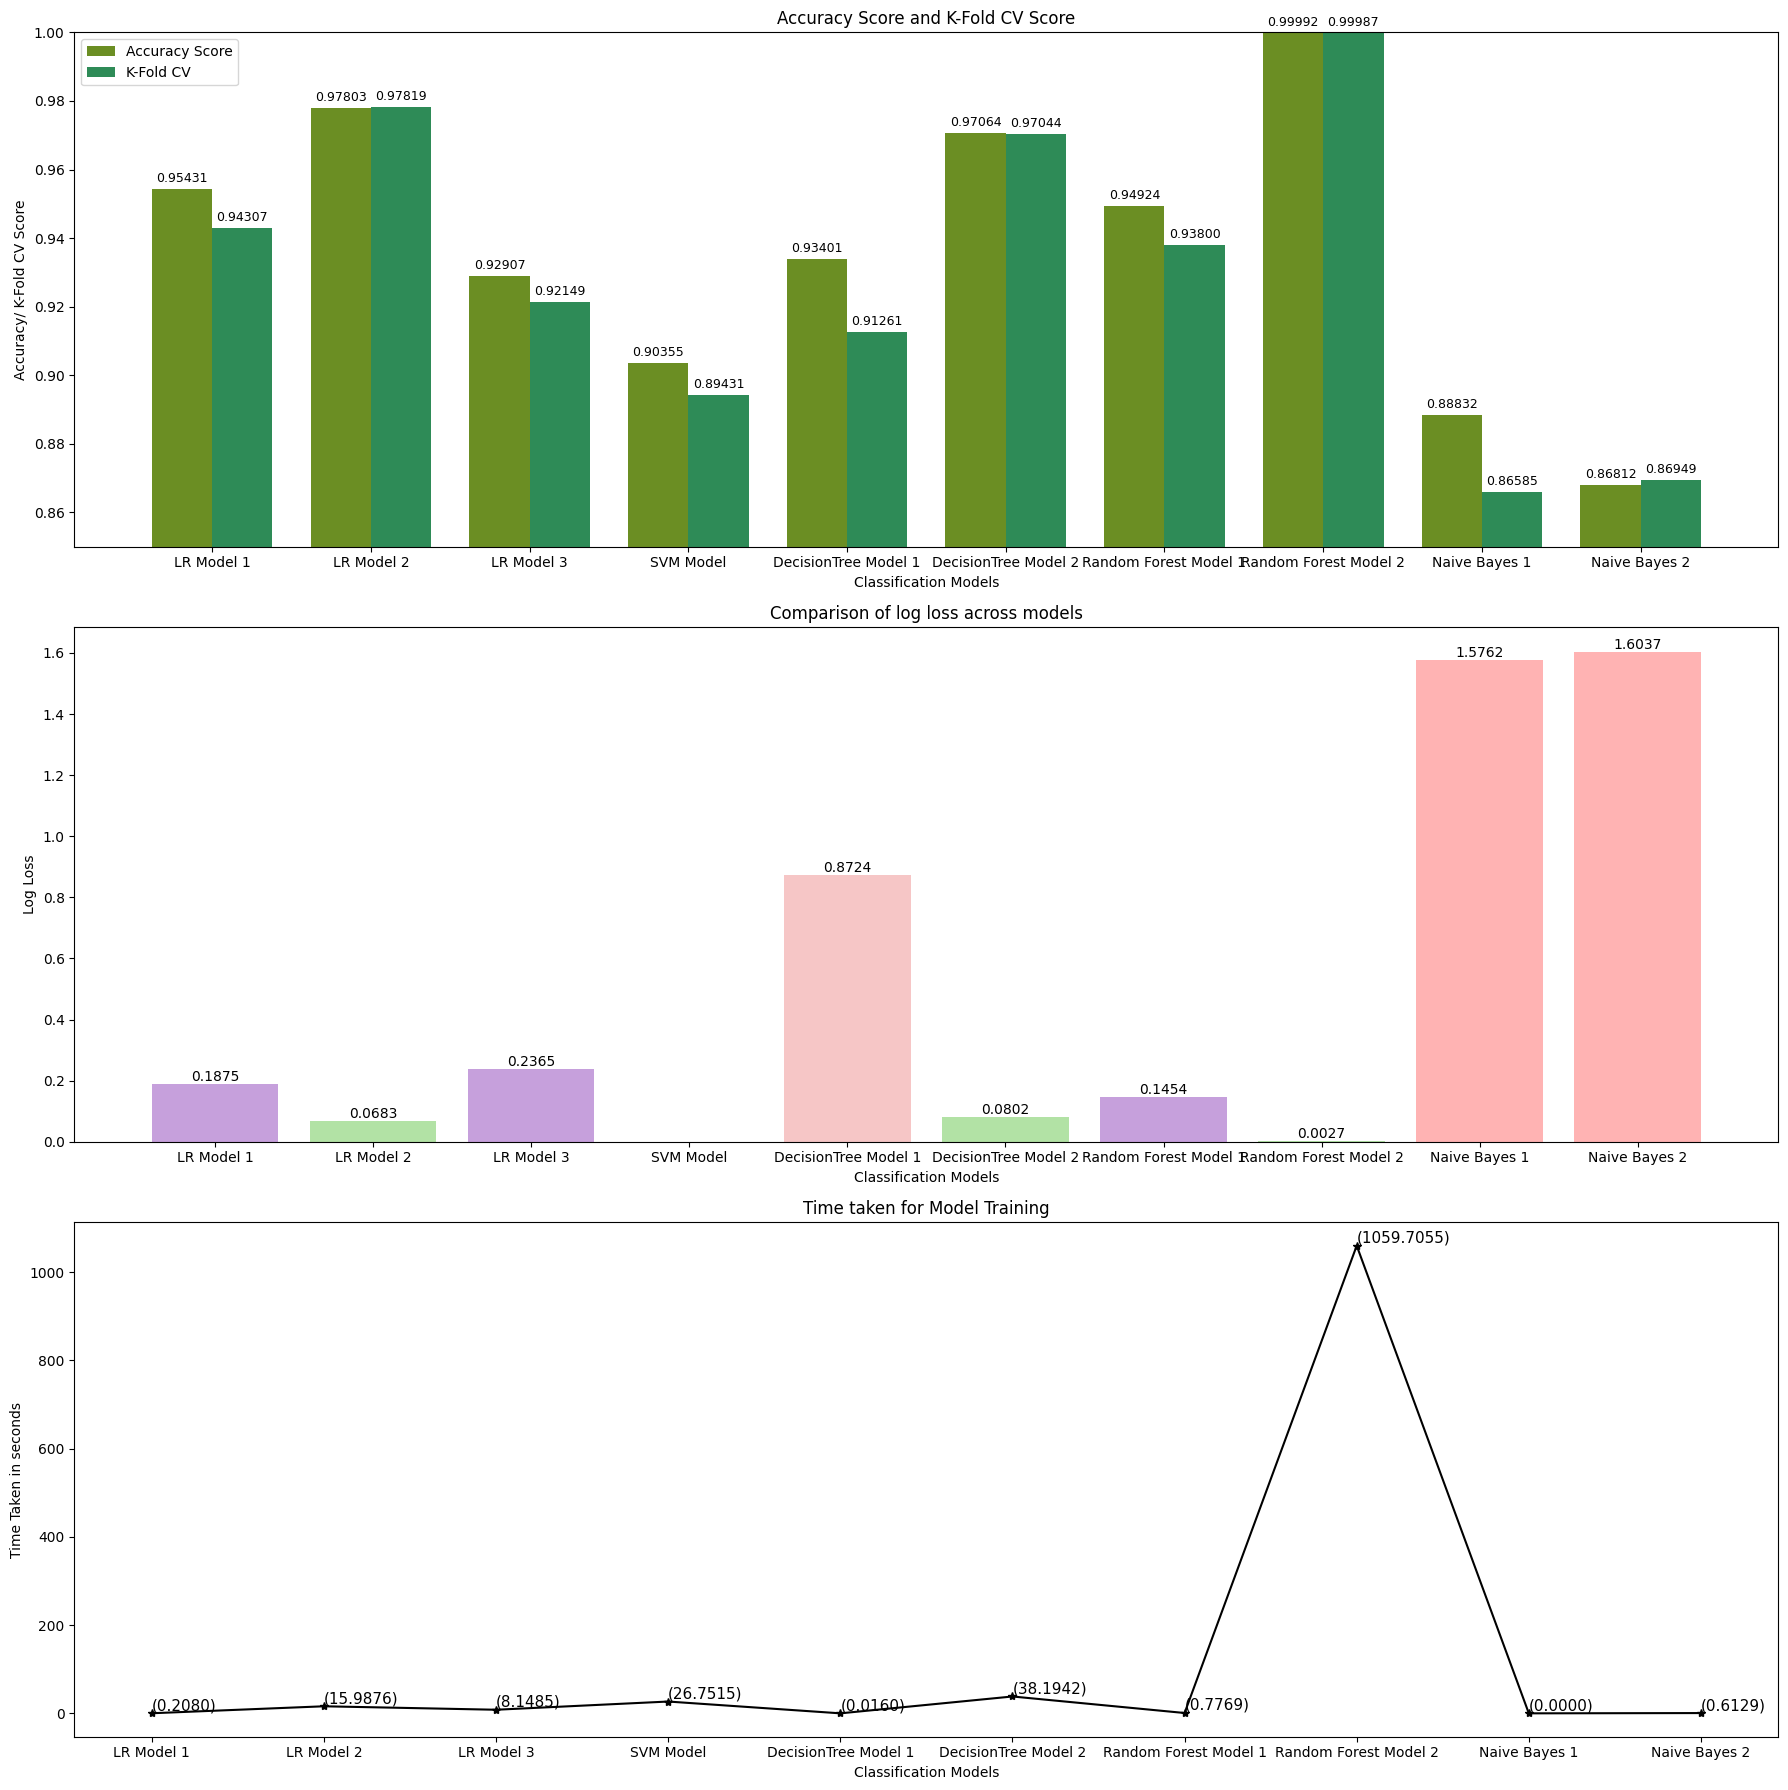

In [161]:
x = np.linspace(0, 5, 5)
fig, axs = plt.subplots(3, 1, figsize=(18, 18))

barwidth = 0.38
modelLists = compareDf.columns
x = [i for i in range(len(modelLists))]

axs[0].bar([p - barwidth/2 for p in x], compareDf.loc['Accuracy Score',], width=barwidth, label='Accuracy Score', color="#6B8E23")
for i, value in enumerate(compareDf.loc['Accuracy Score',]):
    axs[0].annotate(f'{value:.5f}', (x[i] - barwidth/2, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

axs[0].bar([p + barwidth/2 for p in x], compareDf.loc['K-Fold CV',], width=barwidth, label='K-Fold CV', color="#2E8B57")
for i, value in enumerate(compareDf.loc['K-Fold CV',]):
    axs[0].annotate(f'{value:.5f}', (x[i] + barwidth/2, value), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9)

axs[0].set_ylim(0.85,1)

axs[0].legend(loc = "upper left", prop={'size': 10})
axs[0].set_xlabel("Classification Models")
axs[0].set_ylabel("Accuracy/ K-Fold CV Score")

axs[0].set_title('Accuracy Score and K-Fold CV Score')

axs[0].set_xticks(x)
axs[0].set_xticklabels(modelLists)

###########################################################################################################################################

bars = axs[1].bar(compareDf.columns, compareDf.loc['Log Loss'], width = 0.8, align = 'center', color = ['#c6a0dc','#b2e2a5','#c6a0dc','#87CEEB','#f6c6c6','#b2e2a5','#c6a0dc','#b2e2a5', '#FFB3B3', '#FFB3B3'])

for bar in bars:
    height = bar.get_height()
    axs[1].text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha = 'center', va = 'bottom', fontsize=10)

axs[1].set_title('Comparison of log loss across models')
axs[1].set_xlabel("Classification Models")
axs[1].set_ylabel("Log Loss")

###########################################################################################################################################

axs[2].plot(compareDf.columns, compareDf.loc['Time Taken'], marker = '*', color = "black")

for i, (xi, yi) in enumerate(zip(compareDf.columns, compareDf.loc['Time Taken'])):
    axs[2].text(xi, yi, f'({yi:.4f})', fontsize = 11, ha = 'left', va = "bottom")
    
axs[2].set_title('Time taken for Model Training')
axs[2].set_xlabel("Classification Models")
axs[2].set_ylabel("Time Taken in seconds")

###########################################################################################################################################

plt.tight_layout()
plt.show()

## -> Insights and Recommendations for Model Performance and Efficiency

### Insights from the Table
- <b> Overall Performance: </b>
<i> Random Forest Model 2 consistently ranks the highest across several key metrics, including F1 Score (0.999921), Accuracy Score (0.999921), Jaccard Index (0.999842), Log Loss (0.002709), and K-Fold CV (0.999875). This suggests it is the most reliable model in terms of overall performance and generalization. </i>

- <b> Jaccard Index and Distance: </b>
<i> Random Forest Model 2 has the highest Jaccard Index (0.999842) and the lowest Jaccard Distance (0.000158), indicating excellent similarity between predicted and actual sets.
SVM Model has a lower Jaccard Index (0.806122) and higher Jaccard Distance (0.193878) compared to others, suggesting less effectiveness in capturing the relevant patterns. </i>

- <b> Log Loss: </b>
<i> Random Forest Model 2 has the lowest Log Loss (0.002709), indicating the best performance in terms of providing accurate probability estimates.
DecisionTree Model 1 also performs well but is significantly faster in training time. </i>

- <b>Training Time: </b>
<i> DecisionTree Model 1 and Random Forest Model 1 are much faster in terms of training time compared to models like LR Model 2 and Random Forest Model 2, which take considerably longer. This could be crucial for applications requiring quick model updates or iterations. </i>

- <b> Variability:
<i> (Log Loss and Training Time Variability)</b>: The table shows significant variability in Log Loss and training time across models. Random Forest Model 2 exhibits the lowest Log Loss, demonstrating superior probabilistic accuracy, while DecisionTree Model 1 excels in training speed, indicating efficiency. Conversely, models like LR Model 2 and Random Forest Model 2 experience higher training times, which might be a trade-off for their superior performance in Log Loss. This variability highlights the need to balance accuracy with training efficiency based on specific application requirements. </i>

### Recommendations
- <b> Top Choice:
 Random Forest Model 2: </b>   <i>  Best overall model with the lowest Log Loss and high performance in other metrics. Ideal if the highest accuracy and probabilistic prediction are crucial, and training time is less of a concern.</i>

- <b> High Performance with Good Balance:
LR Model 2: </b> <i> High performance across several metrics, making it a good alternative if you need a balance between accuracy and reasonable training time. </i>

- <b> Fast Training Time:
DecisionTree Model 1: </b> <i> Provides very fast training times while maintaining good performance. Ideal if training time is critical but a slightly lower performance compared to top models is acceptable.</i>

- <b> Good All-Rounder:
Random Forest Model 1: </b>  <i> Offers a good balance of performance and training time, making it a suitable choice if you need both efficiency and decent performance. </i>


- <b> Address SVM Limitations:
SVM Model: </b> <i> Since Log Loss is not applicable, focus on alternative metrics like Accuracy Score and F1 Score. It may still be useful for specific scenarios but not ideal if probabilistic predictions are required. </i>

### Hierarchy from Best to Worst Model
- <b> Random Forest Model 2  : </b> <i> Best overall performance and lowest Log Loss. </i>
- <b> LR Model 2 : </b>   <i> Strong performance with high scores in multiple metrics. </i>
- <b> DecisionTree Model 1 : </b> <i> Fast training with good performance. </i>
- <b> Random Forest Model 1 : </b> <i> Decent performance with manageable training time. </i>
- <b> DecisionTree Model 2 : </b> <i> Slightly lower performance and longer training time than DecisionTree Model 1. </i>
- <b> LR Model 1 : </b> <i> Solid performance but not as high as LR Model 2. </i>
- <b> LR Model 3 : </b> <i> Performs well but with the highest Log Loss. </i>
- <b> SVM Model : </b>  <i> Lower performance metrics and cannot be evaluated with Log Loss. </i>
- <b> Naive Bayes 1 : </b>  <i> Lower performance metrics with the highest Log Loss. </i>
- <b> Naive Bayes 2 : </b>  <i> Lower performance metrics with the highest Log Loss. </i>

# Model Implementation

In [162]:
files = [ 'modelLR1.pkl', 'modelLR2.pkl', 'modelSVM.pkl', 'modelTree1.pkl', 'modelTree2.pkl', 'modelRF1.pkl', 'modelRF2.pkl', 'modelNB1.pkl', 'modelNB2.pkl']
loadedModels = {}

In [163]:
for file in files:
    with open('Models/'+file, 'rb') as f:
        modelName = file.split('.')[0]
        loadedModels[modelName] = pickle.load(f)
loadedModels

{'modelLR1': LogisticRegression(C=0.1, max_iter=200, random_state=42),
 'modelLR2': LogisticRegression(C=0.1, max_iter=200, random_state=42),
 'modelSVM': SVC(C=0.01, kernel='linear'),
 'modelTree1': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=19),
 'modelTree2': DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=19),
 'modelRF1': RandomForestClassifier(random_state=42),
 'modelRF2': RandomForestClassifier(random_state=42),
 'modelNB1': GaussianNB(),
 'modelNB2': GaussianNB()}

In [164]:
inp = input(f'Provide 30 input features : ').split(',')
inp = np.asarray(inp, dtype = np.float64).reshape(1,-1)

Provide 30 input features :  -3.12, 4.57, -1.23, 0.45, 3.67, -4.89, 1.01, -2.34, 2.89, -0.76, 4.22, -3.56, 1.78, 0.11, -1.67, 3.45, -4.21, 2.34, -2.89, 0.99, 4.88, -4.12, 1.45, -0.33, 3.29, -2.77, 0.67, 4.11, -1.98, 6.75


In [165]:
scaledInp = scaler.transform(inp[:,1:30])
inp[:,1:30] = scaledInp
inp

array([[-3.12      ,  2.33318927, -0.74486512,  0.29678437,  2.59205304,
        -3.54285105,  0.7581053 , -1.8915336 ,  2.41972458, -0.69177056,
         3.87565626, -3.4877641 ,  1.78142579,  0.1105225 , -1.74213497,
         3.76919666, -4.80455751,  2.75509478, -3.44796839,  1.21615784,
         6.33006896, -5.60908446,  1.99807004, -0.52845726,  5.43221614,
        -5.31387185,  1.38938956, 10.1825479 , -5.99849702, -0.32624231]])

In [166]:
modelPredictions = {}
for model in loadedModels:
    prediction = loadedModels[model].predict(inp)
    modelPredictions[model] = ['legitimate transaction' if prediction == 0 else 'fraudulent transaction' if prediction == 1 else np.nan]
    if model != "modelSVM":
        transactionProbabilities = loadedModels[model].predict_proba(inp)
        modelPredictions[model].append(str(round(transactionProbabilities[0][0],4)*100)+" %" if transactionProbabilities[0][0] >= transactionProbabilities[0][1] else str(round(transactionProbabilities[0][1],5)*100)+" %" if transactionProbabilities[0][0] < transactionProbabilities[0][1] else '-')
    if model == "modelSVM":
        modelPredictions[model].append(np.nan)

In [167]:
outOfSampleOutcomes = pd.DataFrame(modelPredictions, columns = modelPredictions.keys(), index = ['Transaction type', 'Transaction trust level'])

In [168]:
outOfSampleOutcomes

,modelLR1,modelLR2,modelSVM,modelTree1,modelTree2,modelRF1,modelRF2,modelNB1,modelNB2
Transaction type,legitimate transaction,legitimate transaction,legitimate transaction,fraudulent transaction,legitimate transaction,fraudulent transaction,legitimate transaction,fraudulent transaction,fraudulent transaction
Transaction trust level,84.16 %,91.58 %,NaN,84.211 %,100.0 %,55.00000000000001 %,88.0 %,100.0 %,99.997 %
